# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [552]:
# Import libraries to ignore all warning messages
import warnings

# Import the necessary library to mount Google Drive folders in Google Colab
from google.colab import drive

# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the skew function from the scipy.stats module
from scipy.stats import skew

# Import libraries for combinations
import itertools

In [553]:
# Ignore warnings
warnings.filterwarnings('ignore')

### Understanding the structure of the data

In [554]:
# Read data from Google Drive

# Mount Drive folder
drive.mount('/content/drive')

# Read the data
df = pd.read_csv('/content/drive/MyDrive/MIT/foodhub_order.csv')

# Returns the first 5 rows
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.750,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24


In [555]:
# Returns the last 5 rows
df.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.310,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.180,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.220,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.180,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.450,Weekend,Not given,28,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [556]:
# df.shape is a tuple in the form (n_rows, ncolumns)
n_rows = df.shape[0] # Extracting the number of rows (first element)
n_columns = df.shape[1] # Extracting the number of columns (second element)
n_data_points = n_rows * n_columns # Calculating the total number of data points

# The number of rows corresponds to the number of orders (n_orders)
# and will be used later in the code
n_orders = n_rows

# prints the number of rows and columns
print('> The FoodHub DataFrame has',n_rows,'rows and',n_columns,'columns, totaling',n_data_points,'individual data points.')

> The FoodHub DataFrame has 1898 rows and 9 columns, totaling 17082 individual data points.


#### Observations:

*   The DataFrame has 9 columns as mentioned in the detailed data dictionary provided by FoodHub.
*   With a total of 1898 rows, the DataFrame captures information on 1898 distinct food orders. Each row corresponds to a unique order made through FoodHub's online portal.
*   In total, there are 17082 individual data points.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [557]:
# Prints a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

*   The "cost_of_the_order" variable in the DataFrame is not labeled as it is in the data dictionary provided by FoodHub. However, its name corresponds to the description of the "cost" variable in the data dictionary. Therefore, we assume that the "cost_of_the_order" variable in the DataFrame corresponds to the "cost" variable described in the data dictionary. With this assumption, the columns are ordered as in the data dictionary. This assumption is maintained throughout the rest of this report.
*   The "order_id," "customer_id," "food_preparation_time," and "delivery_time" are integer variables according to the description provided by the data dictionary, being stored as int64 (64-bit integer) variables. The cost of the order is a price (decimal number), so it is stored as a float64 (64-bit floating-point) variable. The "restaurant_name," "cuisine_type," "day_of_the_week," and "rating" variables are non-numeric or mixed data types, and therefore are stored as objects. All the data types are appropriate for their respective variables.
* All 1898 data elements in each variable (column) have no missing (non-null) values.
* The DataFrame occupies 133.6 KB of memory.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [558]:
# Check and print the sum of missing values for each variable
print(df.isnull().sum())

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


#### Observations:

*   The output confirms that there are no missing values in the dataset, aligning with the observations from the previous question.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [559]:
# Statistical summary of the non-numerical variables
df_sdnn = df.describe(include='object').transpose()
df_sdnn.head()

,count,unique,top,freq
restaurant_name,1898,178,Shake Shack,219
cuisine_type,1898,14,American,584
day_of_the_week,1898,2,Weekend,1351
rating,1898,4,Not given,736


#### Observations:

- Among the 178 unique restaurants, Shake Shack stands out as the most popular choice.
- American cuisine dominates the preferences, being the most frequently ordered type among the 14 unique cuisine options.
- The dataset shows a notable preference for weekend orders.
- It's noteworthy that 736 out of 1898 customers chose not to provide a rating for their orders.

In [560]:
# Statistical summary of the numerical variables
pd.set_option('display.float_format', lambda x: '%.3f' % x) # set 3 decimal cases
df_sd = df.describe().transpose()
df_sd.head()

,count,mean,std,min,25%,50%,75%,max
order_id,1898.000,1477495.500,548.050,1476547.000,1477021.250,1477495.500,1477969.750,1478444.000
customer_id,1898.000,171168.478,113698.140,1311.000,77787.750,128600.000,270525.000,405334.000
cost_of_the_order,1898.000,16.499,7.484,4.470,12.080,14.140,22.297,35.410
food_preparation_time,1898.000,27.372,4.632,20.000,23.000,27.000,31.000,35.000
delivery_time,1898.000,24.162,4.973,15.000,20.000,25.000,28.000,33.000


In [561]:
# Print the necessary variables and convert time in minutes to "HH h. MM m. SS s."

# Declare variables for cost of the order (c), food preparation time (f), and delivery time (d).
# min - minimum value; max - maximum value; avg - average/mean; std - standard deviation
c_min, c_max, c_avg, c_std = df_sd.iloc[2][3], df_sd.iloc[2][7], df_sd.iloc[2][1], df_sd.iloc[2][2]
f_min, f_max, f_avg, f_std = df_sd.iloc[3][3], df_sd.iloc[3][7], df_sd.iloc[3][1], df_sd.iloc[3][2]
d_min, d_max, d_avg, d_std = df_sd.iloc[4][3], df_sd.iloc[4][7], df_sd.iloc[4][1], df_sd.iloc[4][2]

'''
    Converts a time in minutes to a formatted string ("HH h. MM m. SS s.").

    :param time_minutes: Time to convert in minutes
    :param mode: Mode of the output formatted time

    :return: Formatted time (string) - formatted time depending on mode:
             if mode != 1, m2hms prints in the default format "HH h. MM m. SS s".
               e.g.: time_minutes = 174.4 returns "2 h. 54 m. 24 s."
             if mode == 1, m2hms removes HH, MM, or SS if they are not significant.
               e.g.: time_minutes = 2.2 returns "2 m. 12 s."
                     time_minutes = 2 returns "2 m." and not "2 m. 0 s."

    input: time_minutes - time to convert in minutes
           mode - mode of the output formatted time

    output: formatted time (string) - formatted time depending on mode:

    if mode != 1, m2hms prints in the default format "HH h. MM m. SS s".
      e.g.:  time_minutes = 174.4 returns "2 h. 54 m. 24 s."

    if mode == 1, m2hms removes HH, MM or SS if they are not significant.
      e.g.: time_minutes = 2.2 returns "2 m. 12 s."
            time_minutes = 2 returns "2 m." and not "2 m. 0 s."
'''
def m2hms(time_minutes,mode):
    # Extract hours, minutes, and seconds from the time in minutes
    hours, remainder = divmod(round(time_minutes * 60), 3600)
    minutes, seconds = divmod(remainder, 60)

    # Default formatted time
    formatted_time = f"{hours} h. {minutes} m. {seconds} s."

    # mode = 1 conditions
    if mode == 1 and (hours != 0 or minutes != 0 or seconds != 0):
      if hours == 0:
          formatted_time = f"{minutes} m. {seconds} s."
      if hours == 0 and minutes == 0:
          formatted_time = f"{seconds} s."
      if hours == 0 and seconds == 0:
          formatted_time = f"{minutes} m."
      if hours != 0 and seconds == 0:
          formatted_time = f"{hours} h. {minutes} m."
      if hours != 0 and minutes == 0 and seconds == 0:
          formatted_time = f"{hours} h."

    return formatted_time

# Convert time values to formatted strings
f_min_hm, f_max_hm, f_avg_hm, f_std_hm = m2hms(f_min,1), m2hms(f_max,1), m2hms(f_avg,1), m2hms(f_std,1)
d_min_hm, d_max_hm, d_avg_hm, d_std_hm = m2hms(d_min,1), m2hms(d_max,1), m2hms(d_avg,1), m2hms(d_std,1)

# Print the min/max/avg values for the variables of interest
print('> Cost of the order (cost_of_the_order): \n   min = ${:.2f}'.format(c_min) + '\n   max = ${:.2f}'.format(c_max) + '\n   avg ~ ${:.2f}'.format(c_avg) + '\n   std ~ ${:.2f}'.format(c_std))
print('> Food preparation time (food_preparation_time): \n   min = ' + f_min_hm + '\n   max = ' + f_max_hm + '\n   avg ~ {:.1f}'.format(f_avg)  + ' = ' + f_avg_hm + '\n   std ~ {:.1f} = '.format(f_std) + f_std_hm)
print('> Delivery time (delivery_time): \n   min = ' + d_min_hm + '\n   max = ' + d_max_hm + '\n   avg ~ {:.1f} = '.format(d_avg) + d_avg_hm + '\n   std ~ {:.1f} = '.format(d_std) + d_std_hm)


> Cost of the order (cost_of_the_order): 
   min = $4.47
   max = $35.41
   avg ~ $16.50
   std ~ $7.48
> Food preparation time (food_preparation_time): 
   min = 20 m.
   max = 35 m.
   avg ~ 27.4 = 27 m. 22 s.
   std ~ 4.6 = 4 m. 38 s.
> Delivery time (delivery_time): 
   min = 15 m.
   max = 33 m.
   avg ~ 24.2 = 24 m. 10 s.
   std ~ 5.0 = 4 m. 58 s.


#### Observations:

- The cost of an order varies from \$4.47 to \$35.41. On average, customers spend approximately \$16.50 per order, with a standard deviation of $7.48, reflecting a moderate level of variability in order costs.
- Food preparation times exhibit a range between 20 and 35 minutes. On average, the food preparation time is approximately 27.4 minutes (27 minutes and 22 seconds), with a standard deviation of 4.6 minutes (4 minutes and 38 seconds). This suggests a consistent preparation duration with a relatively small level of variability.
- Delivery times range from 15 to 33 minutes. The average delivery time is approximately 24.2 minutes (24 minutes and 10 seconds), and the standard deviation is 5.0 minutes (4 minutes and 58 seconds). Similar to food preparation times, delivery times show moderate consistency with a moderate level of variability.



### **Question 5:** How many orders are not rated? [1 mark]

In [562]:
# Number of orders that are not rated
not_rated_count = df[df.rating=='Not given'].shape[0]

# Calculate the percentage of orders that are not rated
not_rated_percentage = (not_rated_count / n_orders)*100

# Print the results
print(' > Total number of orders: ',n_orders,'\n > Orders that are not rated: ',not_rated_count,'\n > Percentage of orders that are not rated: ',round(not_rated_percentage,1),'%',sep='')

 > Total number of orders: 1898
 > Orders that are not rated: 736
 > Percentage of orders that are not rated: 38.8%


#### Observations:

*   A significant portion of customers (38.8%) chose not to provide a rating for their orders, suggesting that a considerable portion of the user base either doesn't engage with the rating feature or opts not to express their opinion on the received service.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [563]:
# Display the number of unique values for each variable
df.nunique()

order_id                 1898
customer_id              1200
restaurant_name           178
cuisine_type               14
cost_of_the_order         312
day_of_the_week             2
rating                      4
food_preparation_time      16
delivery_time              19
dtype: int64

In [564]:
# Print the counts of all object variables
for column in ['restaurant_name','cuisine_type', 'day_of_the_week','rating']:
  print("-" * 50,'\n',column,'\n',"-" * 50, sep='')
  print(df[column].value_counts(),'\n')

--------------------------------------------------
restaurant_name
--------------------------------------------------
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64 

--------------------------------------------------
cuisine_type
--------------------------------------------------
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64 

----------

In [565]:
# order_id

In [566]:
# Check for duplicated order_id values
if df['order_id'].duplicated().any():
    print("Warning: Duplicated values found in 'order_id'.")
else:
    print("> No duplicated 'order_id' values. Each 'order_id' is unique.")

> No duplicated 'order_id' values. Each 'order_id' is unique.


#### Observations on the Order ID (order_id):

*   Each order_id is unique, confirming the absence of duplicate entries and ensuring the integrity of the identification system.



In [567]:
# customer_id

In [568]:
# Number of customers
n_customers = df['customer_id'].nunique()
print('> Number of unique customers:',n_customers)

> Number of unique customers: 1200


In [569]:
# Print the possible values of orders per customer
orders_per_customers_values = sorted(df['customer_id'].value_counts().unique())
print('> There are',len(orders_per_customers_values),'different values of orders per customers:' ,orders_per_customers_values)

> There are 11 different values of orders per customers: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13]


In [570]:
# Define function to return the distribution of counts.

# cofc() groups the input column name of the input DataFrame df_input and
# counts its occurrences (let's call the first count 'first_count').
# Then counts how many unique values result from the first count ('second count').
# The output DataFrame is labeled by the unique number of counts from the first count
# and has a column with the respective second count results organized by descending order
'''
  input: input_df - input DataFrame
         input_column_name  - column to count
         column_name_counts - name of the output counts column

  output: df_counts - DataFrame with the second count results labeled by the
                      unique number of counts from the first count,
                      organized by descending order
'''
def cofc(input_df,input_column_name,column_name_counts):
  df_counts = input_df.groupby(input_column_name).size().value_counts().to_frame(name=column_name_counts)
  return df_counts

In [571]:
# DataFrame with the number of orders per customer and the respective number of customers
orders_per_customer_id_counts = cofc(df,'customer_id','number_of_customers')
orders_per_customer_id_counts.head()

,number_of_customers
1,784
2,267
3,83
4,33
5,19


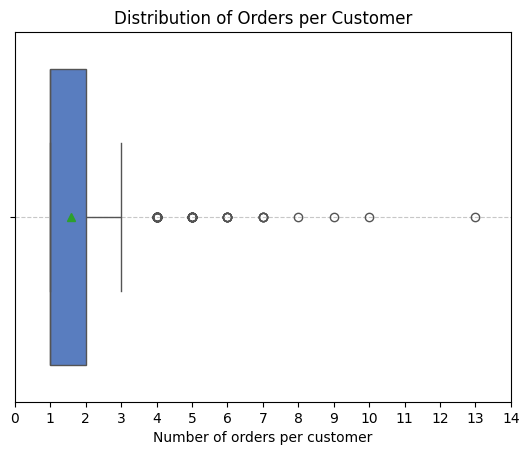

In [572]:
# Number of orders per customer - box plot
sns.boxplot(data=df,x=df['customer_id'].value_counts(), palette = "muted", showmeans=True)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Number of orders per customer')
plt.title('Distribution of Orders per Customer')
plt.xticks(list(range(0,15)))
plt.xlim(0, 14)
plt.show()

In [573]:
# Computes the mean number of orders per customer
print('> The mean number of orders per customer is',round(df['customer_id'].value_counts().mean(),2))

> The mean number of orders per customer is 1.58


Text(0.5, 1.0, 'Count of Customers by Number of Orders')

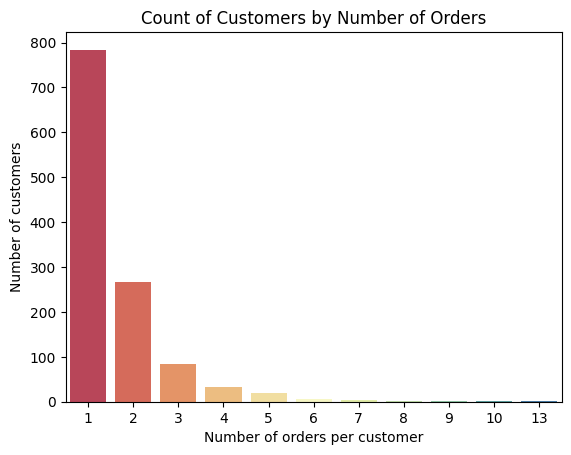

In [574]:
# Barplot plotting the number of customers per the number of orders per customer
ax = sns.countplot(x=df['customer_id'].value_counts(), palette = "Spectral")
ax.set(xlabel="Number of orders per customer", ylabel='Number of customers')
plt.title("Count of Customers by Number of Orders")

In [575]:
# Create a function to generate a DataFrame with percentages based on count data.

# count2perc receives a DataFrame with counts organized by descending order
# and returns a DataFrame with several variables
# useful for analyzing the top values in terms of count
'''
  input: input_count_df - input DataFrame with counts
         input_index_name - name of the variable used to label the DataFrame
         input_counts_name - name of the counts column

  output: output_df - DataFrame labeled with indices with the following columns:

  [input_index_name] - name of the variable used to label the DataFrame (input variable)
  [input_counts_name] - name of the counts column (input variable)
  top_position - top position (top position = index + 1)
  top_position_cp - top position in cumulative percentage
  [input_counts_name]_p - percentage of the counts
  [input_counts_name]_c - cumulative counts
  [input_counts_name]_cp - cumulative percentage of the counts
  [input_counts_name]_ca - number of counts above the current index
  [input_counts_name]_cap - cumulative percentage of the counts above the current index
'''
def count2perc(input_count_df,input_index_name,input_counts_name):
  output_df = input_count_df.reset_index()
  output_df['top_position'] = output_df.index + 1
  output_df.columns = [input_index_name, input_counts_name, 'top_position']
  n_counts = len(output_df)
  counts_sum = output_df[input_counts_name].sum()
  output_df['top_position_cp'] = round((output_df['top_position']/n_counts)*100,3)
  output_df[input_counts_name + '_p'] = round((output_df[input_counts_name]/counts_sum)*100,3)
  output_df[input_counts_name + '_c'] = output_df[input_counts_name].cumsum()
  output_df[input_counts_name + '_cp'] = round((output_df[input_counts_name +'_c']/counts_sum)*100,3)
  output_df[input_counts_name + '_ca'] = counts_sum - output_df[input_counts_name + '_c']
  output_df[input_counts_name + '_cap'] = round((output_df[input_counts_name + '_ca']/counts_sum)*100,3)
  return output_df

In [576]:
# Obtains the DataFrame with top data
orders_per_customer_id_top = count2perc(orders_per_customer_id_counts,"orders_per_customer","num_customers")
orders_per_customer_id_top.head()

,orders_per_customer,num_customers,top_position,top_position_cp,num_customers_p,num_customers_c,num_customers_cp,num_customers_ca,num_customers_cap
0,1,784,1,9.091,65.333,784,65.333,416,34.667
1,2,267,2,18.182,22.250,1051,87.583,149,12.417
2,3,83,3,27.273,6.917,1134,94.500,66,5.500
3,4,33,4,36.364,2.750,1167,97.250,33,2.750
4,5,19,5,45.455,1.583,1186,98.833,14,1.167


In [577]:
# Print interesting values
print('> Customers with 1 order: ', round(orders_per_customer_id_top[orders_per_customer_id_top['top_position'] == 1]['num_customers'].values[0],1), sep='')
print('> Percentage of customers with 1 order: ', round(orders_per_customer_id_top[orders_per_customer_id_top['top_position'] == 1]['num_customers_p'].values[0],1),'%', sep='')
print('> Percentage of customers with more than 1 order: ', 100 - round(orders_per_customer_id_top[orders_per_customer_id_top['top_position'] == 1]['num_customers_p'].values[0],1),'%', sep='')
print('> Percentage of customers with 1-2 orders: ', round(orders_per_customer_id_top[orders_per_customer_id_top['top_position'] == 2]['num_customers_cp'].values[0],1),'%', sep='')
print('> Customers with more than 2 orders: ', round(orders_per_customer_id_top[orders_per_customer_id_top['top_position'] == 2]['num_customers_ca'].values[0],1), sep='')
print('> Percentage of customers with more than 2 orders: ', round(orders_per_customer_id_top[orders_per_customer_id_top['top_position'] == 2]['num_customers_cap'].values[0],1),'%', sep='')

> Customers with 1 order: 784
> Percentage of customers with 1 order: 65.3%
> Percentage of customers with more than 1 order: 34.7%
> Percentage of customers with 1-2 orders: 87.6%
> Customers with more than 2 orders: 149
> Percentage of customers with more than 2 orders: 12.4%


#### Observations on the Customer ID (customer_id):

*   The dataset comprises 1200 distinct customers.
*   There are 11 different values of orders per customer, ranging from 1 to 13.
*   The majority of customers (65.3%) have placed a single order.
*   Customers with more than 2 orders: 149 (12.4%).
*   The mean number of orders per customer is 1.58.


In [578]:
# restaurant_name

In [579]:
# number of restaurants
n_restaurants = len(df.restaurant_name.value_counts())
print('> There are',n_restaurants,'restaurants')

> There are 178 restaurants


In [580]:
# Print the top restaurantes in terms of orders
df.restaurant_name.value_counts().head(5)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

In [581]:
# Define function to return a Dataframe with the counts of X by descending order

# dfc returns a DataFrame with the number of counts of the variable X
# labeled by the unique values of X (distribution of X)
'''
  input: input_df - input DataFrame
         column_name_to_count - name of the column/variable to count
         column_name_counts - name of the counts column/variable

  output: output_df - DataFrame with the number of counts of the column/variable X
                      by descendent order and labeled by the unique values of X
'''
def dfc(df_input,column_name_to_count ,column_name_counts):
  df_counts = df_input[column_name_to_count].value_counts().to_frame()
  df_counts.columns = [column_name_counts]
  #df_counts = df[column_name_to_count].value_counts().rename_axis(column_name_to_count).reset_index(name=column_name_counts)
  return df_counts

In [582]:
# Create a DataFrame with distribution of restaurant
restaurant_name_counts = dfc(df,'restaurant_name','order_count')
restaurant_name_counts.head()

,order_count
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


In [583]:
# Generate a DataFrame with percentages for restaurant counts
restaurant_name_counts_top = count2perc(restaurant_name_counts,'restaurant_name','order_count')

# Display the top 10 restaurants based on counts and the respective percentages
restaurant_name_counts_top.head(10)

,restaurant_name,order_count,top_position,top_position_cp,order_count_p,order_count_c,order_count_cp,order_count_ca,order_count_cap
0,Shake Shack,219,1,0.562,11.538,219,11.538,1679,88.462
1,The Meatball Shop,132,2,1.124,6.955,351,18.493,1547,81.507
2,Blue Ribbon Sushi,119,3,1.685,6.270,470,24.763,1428,75.237
3,Blue Ribbon Fried Chicken,96,4,2.247,5.058,566,29.821,1332,70.179
4,Parm,68,5,2.809,3.583,634,33.404,1264,66.596
5,RedFarm Broadway,59,6,3.371,3.109,693,36.512,1205,63.488
6,RedFarm Hudson,55,7,3.933,2.898,748,39.410,1150,60.590
7,TAO,49,8,4.494,2.582,797,41.992,1101,58.008
8,Han Dynasty,46,9,5.056,2.424,843,44.415,1055,55.585
9,Blue Ribbon Sushi Bar & Grill,44,10,5.618,2.318,887,46.733,1011,53.267


In [584]:
# Print some interesting values
print('> Sum of orders from the top 10 restaurants: ', round(restaurant_name_counts_top[restaurant_name_counts_top['top_position'] == 10]['order_count_c'].values[0],1), sep='')
print('> Percentage of orders from the top 10 (',round(restaurant_name_counts_top[restaurant_name_counts_top['top_position'] == 10]['top_position_cp'].values[0],1),'%) restaurants: ',
      round(restaurant_name_counts_top[restaurant_name_counts_top['top_position'] == 10]['order_count_cp'].values[0],1),'%', sep='')
print('> Percentage of orders from the top 20 (',round(restaurant_name_counts_top[restaurant_name_counts_top['top_position'] == 20]['top_position_cp'].values[0],1),'%) restaurants: ',
      round(restaurant_name_counts_top[restaurant_name_counts_top['top_position'] == 20]['order_count_cp'].values[0],1),'%', sep='')
print('> Percentage of orders from the top 30 (',round(restaurant_name_counts_top[restaurant_name_counts_top['top_position'] == 30]['top_position_cp'].values[0],1),'%) restaurants: ',
      round(restaurant_name_counts_top[restaurant_name_counts_top['top_position'] == 30]['order_count_cp'].values[0],1),'%', sep='')
print('> Percentage of orders from half of the restaurants (',round(restaurant_name_counts_top[restaurant_name_counts_top['top_position'] == 89]['top_position_cp'].values[0],1),'%) restaurants: ',
      round(restaurant_name_counts_top[restaurant_name_counts_top['top_position'] == 89]['order_count_cp'].values[0],1),'%', sep='')

> Sum of orders from the top 10 restaurants: 887
> Percentage of orders from the top 10 (5.6%) restaurants: 46.7%
> Percentage of orders from the top 20 (11.2%) restaurants: 62.9%
> Percentage of orders from the top 30 (16.9%) restaurants: 72.0%
> Percentage of orders from half of the restaurants (50.0%) restaurants: 92.4%


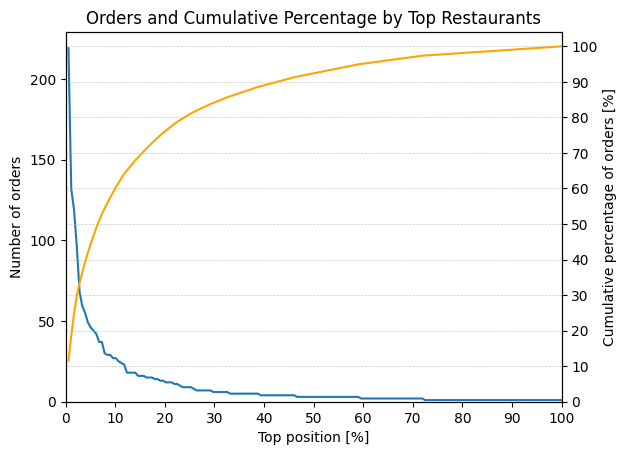

In [585]:
# Plot the number of orders and accumulative percentage
# as a function of the restaurant top position (in percentage)
ax1 = sns.lineplot(x='top_position_cp', y='order_count', data=restaurant_name_counts_top, color='tab:blue')
ax1.set(xlabel='Top position [%]',ylabel="Number of orders")
ax1.set_ylim(0,restaurant_name_counts_top[restaurant_name_counts_top['top_position'] == 1]['order_count'].values[0]+10)
ax2 = ax1.twinx()
ax2 = sns.lineplot(x='top_position_cp', y='order_count_cp', data=restaurant_name_counts_top, ax=ax2, color='orange')
ax2.set(ylabel="Cumulative percentage of orders [%]")
ax2.set_yticks(list(range(0, 111, 10)))
ax2.set_ylim(0, 104)
ax2.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.xlim(0, 100)
plt.title('Orders and Cumulative Percentage by Top Restaurants')
plt.xticks(list(range(0,101,10)))
plt.xlim(0, 100)
plt.show()

In [586]:
# DataFrame with the number of orders per restaurant
orders_per_restaurant_counts = cofc(df,'restaurant_name','number_of_restaurants')
orders_per_restaurant_counts.head()

,number_of_restaurants
1,50
3,23
2,23
4,13
5,11


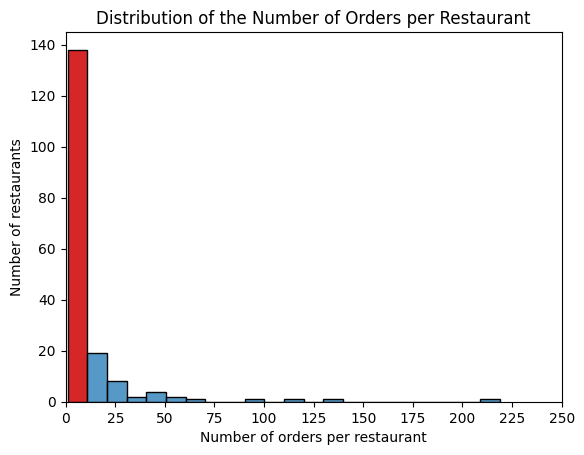

In [587]:
# Histogram with the mumber of orders per restaurant
ax = sns.histplot(df['restaurant_name'].value_counts(),binwidth=10, color='tab:blue')
ax.set(xlabel='Number of orders per restaurant',ylabel="Number of restaurants")
ax.patches[0].set_facecolor('tab:red')
plt.title('Distribution of the Number of Orders per Restaurant')
plt.xticks(list(range(0,251,25)))
plt.xlim(0, 250)
plt.show()

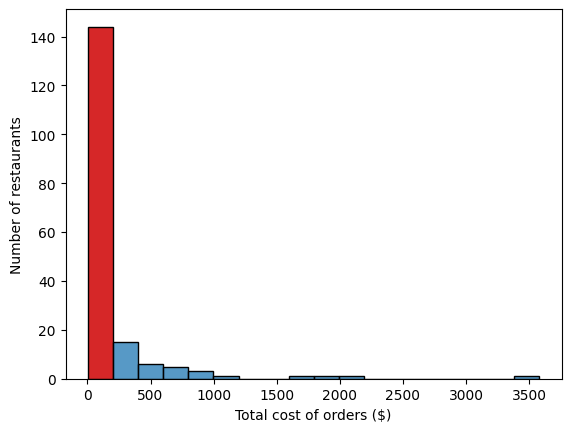

In [588]:
# DataFrame with the total cost of orders by restaurant
df_rg = df.groupby('restaurant_name')['cost_of_the_order'].sum().sort_values(ascending=False).reset_index()
df_rg.head()

# Histogram of number of restaurants by the total costs order
ax = sns.histplot(df_rg['cost_of_the_order'],binwidth=200)
ax.patches[0].set_facecolor('tab:red')
ax.set(ylabel="Number of restaurants")
ax.set(xlabel='Total cost of orders ($)')
plt.show()

#### Observations on the Restaurant name (restaurant_name):

*   There are 178 unique restaurants, featuring diverse cuisine types.
*   Top 3 restaurants: "Shake Shack," "The Meatball Shop," and "Blue Ribbon Sushi."
*   The top 10 restaurants handle 46.7% of all orders.
*   Less than 10% of the top restaurants have 50% of the orders.
*   Cumulative percentage analysis indicates that the top 20% of restaurants significantly influence overall demand.


In [589]:
# cuisine_type

In [590]:
# Print the list of sorted cuisine types
cuisine_list = sorted(list(df['cuisine_type'].unique()))
n_cuisine_type = len(cuisine_list)
print('> Cuisine types (',n_cuisine_type,'):',sep='')
for rn in cuisine_list:
    print(' ',rn)

> Cuisine types (14):
  American
  Chinese
  French
  Indian
  Italian
  Japanese
  Korean
  Mediterranean
  Mexican
  Middle Eastern
  Southern
  Spanish
  Thai
  Vietnamese


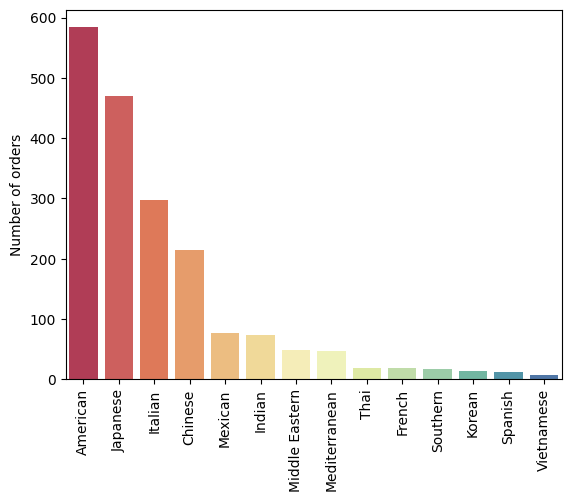

In [591]:
# Distribution of orders for each cuisine type
ax=sns.countplot(data=df, x='cuisine_type', order= df['cuisine_type'].value_counts().index, palette='Spectral')
ax.tick_params(axis='x', rotation=90)
ax.set(xlabel='')
ax.set(ylabel='Number of orders')
plt.show()

In [592]:
# Create a DataFrame with cuisine type counts
cuisine_type_counts = dfc(df,'cuisine_type','order_count')
cuisine_type_counts.head()

,order_count
American,584
Japanese,470
Italian,298
Chinese,215
Mexican,77


In [593]:
# Generate a DataFrame with percentages for cuisine counts
cuisine_type_counts_top = count2perc(cuisine_type_counts,'cuisine_type','order_count')

# Display the top 5 cuisines
cuisine_type_counts_top.head()

,cuisine_type,order_count,top_position,top_position_cp,order_count_p,order_count_c,order_count_cp,order_count_ca,order_count_cap
0,American,584,1,7.143,30.769,584,30.769,1314,69.231
1,Japanese,470,2,14.286,24.763,1054,55.532,844,44.468
2,Italian,298,3,21.429,15.701,1352,71.233,546,28.767
3,Chinese,215,4,28.571,11.328,1567,82.561,331,17.439
4,Mexican,77,5,35.714,4.057,1644,86.617,254,13.383


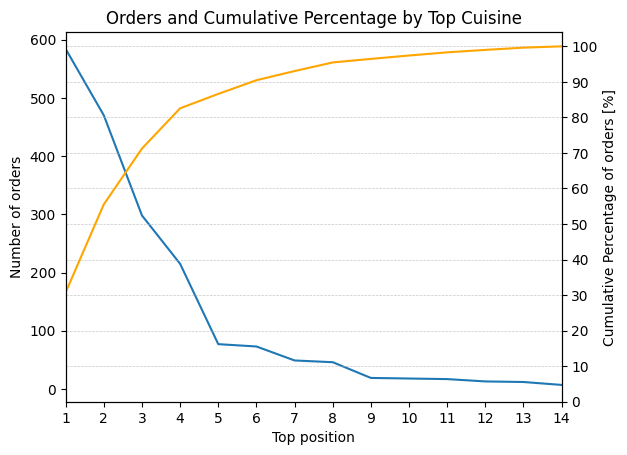

In [594]:
# Plot the number of orders and accumulative percentage
# as a function of the cuisine type top position
ax1 = sns.lineplot(x='top_position', y='order_count', data=cuisine_type_counts_top, color='tab:blue')
ax1.set(xlabel='Top position',ylabel='Number of orders')
ax2 = ax1.twinx()
ax2 = sns.lineplot(x='top_position', y='order_count_cp', data=cuisine_type_counts_top, ax=ax2, color='orange')
ax2.set(ylabel='Cumulative Percentage of orders [%]')
ax2.set_yticks(list(range(0, 111, 10)))
ax2.set_ylim(0, 104)
ax2.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.title('Orders and Cumulative Percentage by Top Cuisine')
plt.xticks(list(range(0,n_cuisine_type+1,1)))
plt.xlim(1, n_cuisine_type)
plt.show()

In [595]:
# Print some interesting values
for j in [1,2,4]:
  print('> Sum of orders from the top',j+1,'cuisine type:', round(cuisine_type_counts_top[cuisine_type_counts_top['top_position'] == j+1]['order_count_c'].values[0],1))
  print('> Percentage of orders from the top',j+1,' cuisine type: ',round(cuisine_type_counts_top[cuisine_type_counts_top['top_position'] == j+1]['order_count_cp'].values[0],1),'%', sep='')

> Sum of orders from the top 2 cuisine type: 1054
> Percentage of orders from the top2 cuisine type: 55.5%
> Sum of orders from the top 3 cuisine type: 1352
> Percentage of orders from the top3 cuisine type: 71.2%
> Sum of orders from the top 5 cuisine type: 1644
> Percentage of orders from the top5 cuisine type: 86.6%


#### Observations on the Cuisine type (cuisine_type):

*   There are 14 cuisine types, with American, Japanese, and Italian being the top 3.
*   The top 2 cuisine types account for 55.5% of orders.
*   The top 5 cuisine types contribute to 86.6% of orders.


In [596]:
# cost_of_the_order

In [597]:
# Statistical summary of the numerical variables
df_sd.loc['cost_of_the_order'].to_frame().transpose().head()

,count,mean,std,min,25%,50%,75%,max
cost_of_the_order,1898.000,16.499,7.484,4.470,12.080,14.140,22.297,35.410


In [598]:
# number of unique costs
n_cost_of_the_order = len(list(df['cost_of_the_order'].unique()))
print('> number of unique order costs: ',n_cost_of_the_order,sep='')

> number of unique order costs: 312


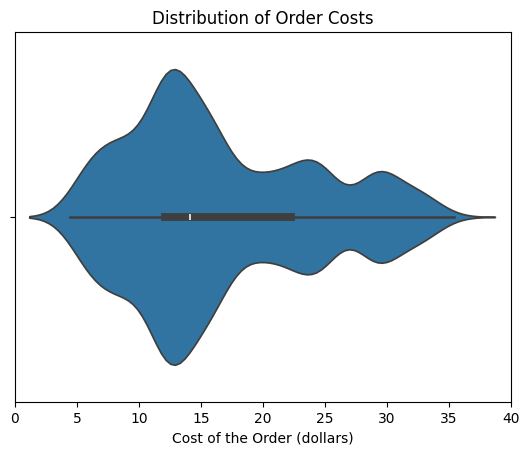

In [599]:
# Density of cost_of_the_order data points
sns.violinplot(x='cost_of_the_order', data=df)
plt.title('Distribution of Order Costs')
plt.xticks(list(range(0,41,5)))
plt.xlim(0, 40)
plt.xlabel('Cost of the Order (dollars)')
plt.show()

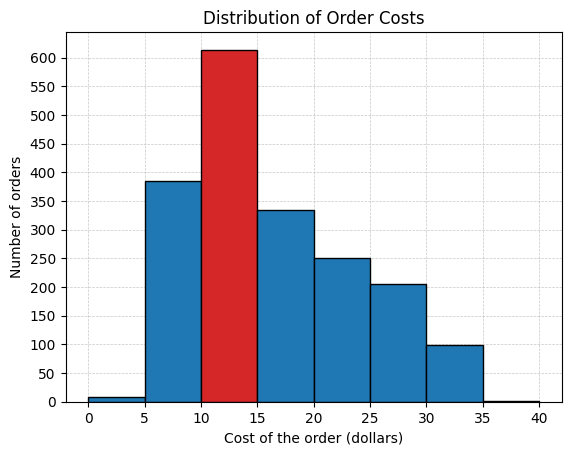

In [600]:
# Histogram of the costs of all orders
ax = sns.histplot(data=df, x='cost_of_the_order', binwidth=5, binrange=(0,40), zorder=2, alpha=1, color='tab:blue')
ax.patches[2].set_facecolor('tab:red')
ax.set(xlabel='Cost of the order (dollars)')
ax.set(ylabel='Number of orders')
ax.set(xticks=range(0,45,5))
ax.set(yticks=range(0,650,50))
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7, zorder=1)
plt.title('Distribution of Order Costs')
plt.show()

In [601]:
# Number of orders in the range [min_cost, max_cost]
range_list = [[10,15],[10,20],[5,35], [10,30]]
for rg in range_list:
  n_outside = df[df.cost_of_the_order < rg[0]]['order_id'].count() + df[df.cost_of_the_order > rg[1]]['order_id'].count()
  n_within = n_orders - n_outside
  print('> Number of orders within the range [',rg[0],',',rg[1],']$: ',n_within,' (',round((n_within/n_orders)*100,1),
        '%); outside the range: ',n_outside,' (',round((n_outside/n_orders)*100,1),'%)',sep='')

> Number of orders within the range [10,15]$: 614 (32.3%); outside the range: 1284 (67.7%)
> Number of orders within the range [10,20]$: 949 (50.0%); outside the range: 949 (50.0%)
> Number of orders within the range [5,35]$: 1888 (99.5%); outside the range: 10 (0.5%)
> Number of orders within the range [10,30]$: 1404 (74.0%); outside the range: 494 (26.0%)


#### Observations on the Cost of the order (cost_of_the_order):

*   The mean cost of the order is \$15.40 with a standard deviation of \$7.49.
*   About 32.3% of orders fall within the \$10-15 range, and 50.0% within the $10-20 range.
*   Majority of orders (99.5%) fall within the \$5-35 range.
*   When considering the range \$10-30, 74.0% of orders are included.


In [602]:
# day_of_the_week

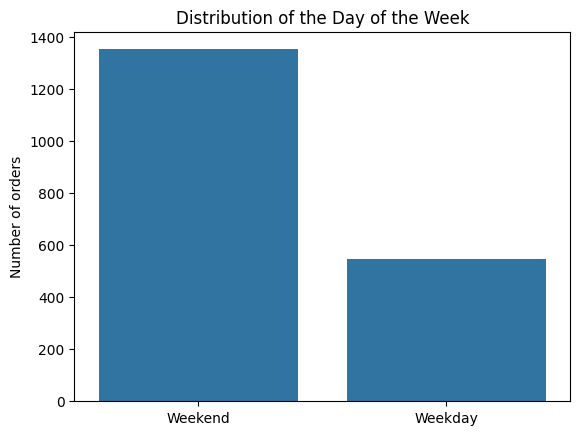

In [603]:
# Countplot of number of orders by day of the week
ax = sns.countplot(data=df,x='day_of_the_week')
ax.set(xlabel='')
ax.set(ylabel='Number of orders')
plt.title('Distribution of the Day of the Week')
plt.show()

In [604]:
# Create a DataFrame with day of the week value counts
day_of_the_week_counts = df["day_of_the_week"].value_counts().to_frame()
day_of_the_week_counts.columns = ["order_count"]
day_of_the_week_counts.head()

# Generate a DataFrame with percentages for day of the week counts
day_of_the_week_counts_top = count2perc(day_of_the_week_counts,'day_of_the_week','order_count')

# Display the percentages
day_of_the_week_counts_top.head(n_cuisine_type)

,day_of_the_week,order_count,top_position,top_position_cp,order_count_p,order_count_c,order_count_cp,order_count_ca,order_count_cap
0,Weekend,1351,1,50.000,71.180,1351,71.180,547,28.820
1,Weekday,547,2,100.000,28.820,1898,100.000,0,0.000


#### Observations on the Day of the week (day_of_the_week):

*   Most orders are placed during the weekend (71.2%), with 28.8% on weekdays.


In [605]:
# rating

In [606]:
# number of unique rating values
n_rating = len(list(df['rating'].unique()))
print('> Number of unique rating values:',n_rating)

> Number of unique rating values: 4


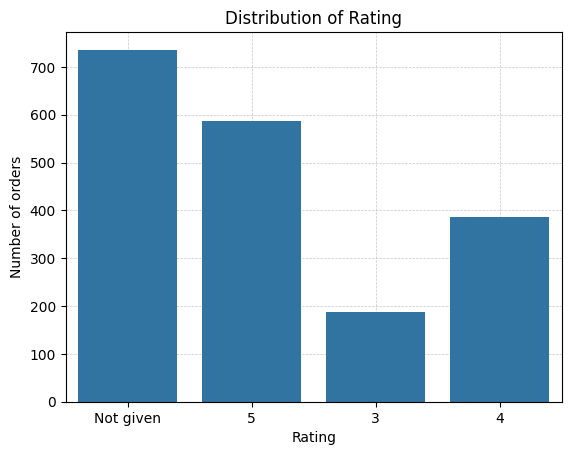

In [607]:
# Countplot of number of orders by rating
ax=sns.countplot(data=df, x='rating', zorder=2)
ax.set(xlabel='Rating')
ax.set(ylabel='Number of orders')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7, zorder=1)
plt.title('Distribution of Rating')
plt.show()

In [608]:
# Create a DataFrame with rating counts
rating_counts = dfc(df,'rating','order_count')

# Generate a DataFrame with percentages for day of the rating counts
rating_counts_top = count2perc(rating_counts,'rating','order_count')

# Display the percentages
rating_counts_top.head(n_rating)

,rating,order_count,top_position,top_position_cp,order_count_p,order_count_c,order_count_cp,order_count_ca,order_count_cap
0,Not given,736,1,25.000,38.778,736,38.778,1162,61.222
1,5,588,2,50.000,30.980,1324,69.758,574,30.242
2,4,386,3,75.000,20.337,1710,90.095,188,9.905
3,3,188,4,100.000,9.905,1898,100.000,0,0.000


In [609]:
# Percentage excluding rating = 'Not given'
df_rng = df[df['rating'] != 'Not given'].copy()

# Remove Not given
rating_counts_rng = dfc(df_rng,'rating','order_count')

# Generate a DataFrame with percentages for day of the rating counts
rating_counts_top_rng = count2perc(rating_counts_rng,'rating','order_count')

# Display the percentages
rating_counts_top_rng.head()

,rating,order_count,top_position,top_position_cp,order_count_p,order_count_c,order_count_cp,order_count_ca,order_count_cap
0,5,588,1,33.333,50.602,588,50.602,574,49.398
1,4,386,2,66.667,33.219,974,83.821,188,16.179
2,3,188,3,100.000,16.179,1162,100.000,0,0.000


#### Observations on the Rating (rating):

*   38.8% of orders lack a specific rating ("Not given").
*   61.2% of orders have a rating of 4 or 5.
*   31% of orders are rated 5 stars.
*   Without "Not given" ratings, 16.2% have a rating of 3, while 50.6% have the highest rating (5).


In [610]:
# food_preparation_time

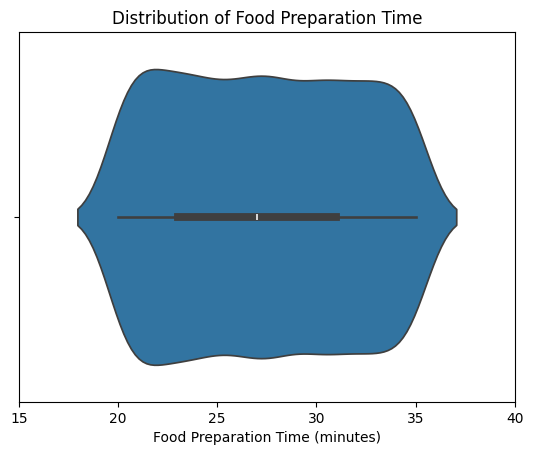

In [611]:
# Density of food_preparation_time data points
sns.violinplot(x='food_preparation_time', data=df)
plt.title('Distribution of Food Preparation Time')
plt.xlabel('Food Preparation Time (minutes)')
plt.xlim(15, 40)
plt.show()

In [612]:
# Statistical summary of the numerical variables
df_sd.loc['food_preparation_time'].to_frame().transpose().head()

,count,mean,std,min,25%,50%,75%,max
food_preparation_time,1898.000,27.372,4.632,20.000,23.000,27.000,31.000,35.000


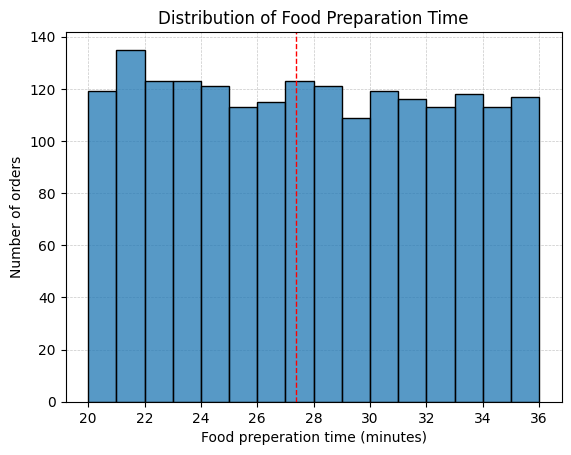

In [613]:
# Histogram of the food preparation time
ax=sns.histplot(data=df, x='food_preparation_time',binwidth=1, binrange=(20,36), zorder=2)
ax.set(xlabel='Food preperation time (minutes)')
ax.set(ylabel='Number of orders')
plt.title('Distribution of Food Preparation Time')
plt.axvline(df['food_preparation_time'].mean(), color='r', linewidth=1, linestyle='--')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7, zorder=1)
plt.show()

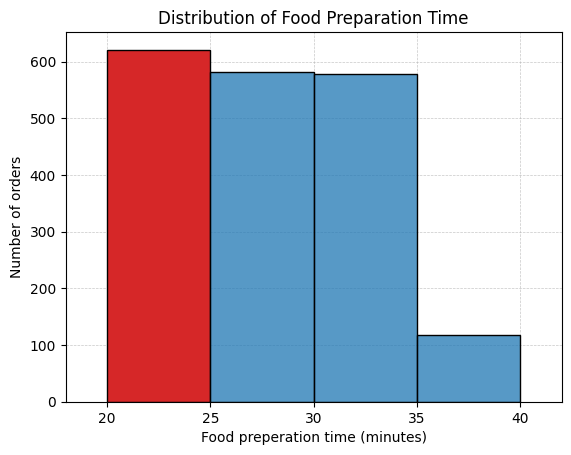

In [614]:
# The same histogram of the food preparation time with binwidth=5
ax=sns.histplot(data=df, x='food_preparation_time',binwidth=5, binrange=(20,40), zorder=2)
ax.patches[0].set_facecolor('tab:red')
ax.set(xlabel='Food preperation time (minutes)')
ax.set(ylabel='Number of orders')
plt.title('Distribution of Food Preparation Time')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7, zorder=1)
ax.set(xticks=range(0,50,5))
plt.xlim(18, 42)
plt.show()

#### Observations on the Food preparation time (food_preparation_time):

*   Most orders are prepared in the range of 20-35 minutes.
*   The average preparation time is 27.37 minutes (27 minutes and 22 seconds), with a standard deviation of 4.63.
*   The distribution's 25%, 50%, and 75% percentiles are 23, 27, and 31 minutes, respectively.


In [615]:
# delivery_time

In [616]:
# Statistical summary of the numerical variables
df_sd.loc['delivery_time'].to_frame().transpose().head()

,count,mean,std,min,25%,50%,75%,max
delivery_time,1898.000,24.162,4.973,15.000,20.000,25.000,28.000,33.000


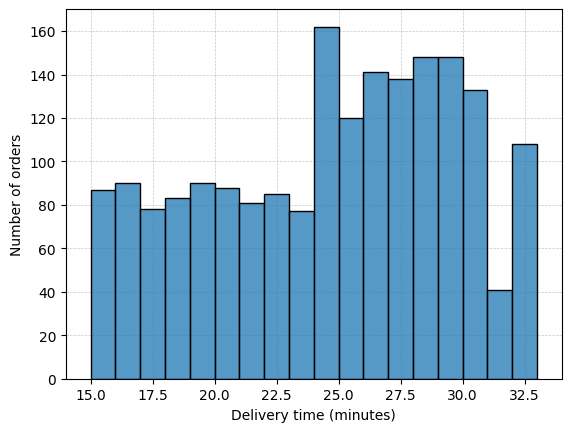

In [617]:
# Histogram of the delivery time
ax=sns.histplot(data=df, x='delivery_time',binwidth=1, binrange=(15,33), zorder=2)
ax.set(xlabel='Delivery time (minutes)')
ax.set(ylabel='Number of orders')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7, zorder=1)
plt.xlim(14, 34)
plt.show()

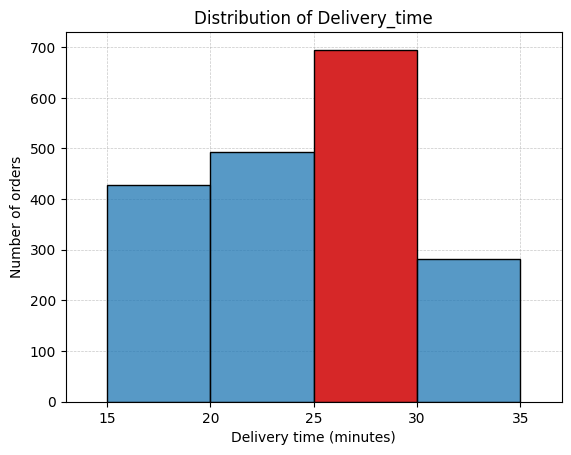

In [618]:
# Histogram of the delivery time for binwidth=5
ax=sns.histplot(data=df, x='delivery_time',binwidth=5, binrange=(15,35), zorder=2)
ax.patches[2].set_facecolor('tab:red')
ax.set(xlabel='Delivery time (minutes)')
ax.set(ylabel='Number of orders')
plt.title('Distribution of Delivery_time')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7, zorder=1)
ax.set(xticks=range(0,45,5))
plt.xlim(13, 37)
plt.show()

In [619]:
# Food preparation time and the delivery time distributions with reseted index
dt_counts = dfc(df,'delivery_time','order_count').reset_index().rename(columns={'index': 'delivery_time'})
fpt_counts = dfc(df,'food_preparation_time','order_count').reset_index().rename(columns={'index': 'food_preparation_time'})

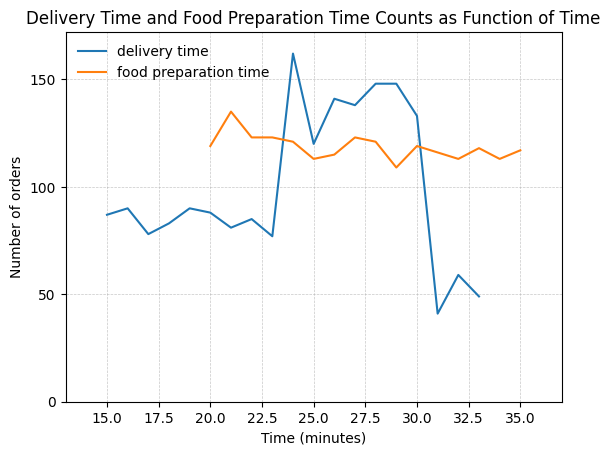

In [620]:
# Plot the delivery time and food preparation time counts as function of time
ax = sns.lineplot(x='delivery_time', y='order_count', data=dt_counts, label='delivery time')
ax = sns.lineplot(x='food_preparation_time', y='order_count', data=fpt_counts, label='food preparation time')
ax.set(xlabel='Time (minutes)', ylabel='Number of orders')
plt.title('Delivery Time and Food Preparation Time Counts as Function of Time')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
ax.set(xticks=np.arange(0, 45, 2.5), yticks=np.arange(0, max(dt_counts['order_count'].max(), fpt_counts['order_count'].max()) + 10, 50))
plt.xlim(13, 37)
plt.ylim(0, max(dt_counts['order_count'].max(), fpt_counts['order_count'].max()) + 10)
legend = ax.legend()
legend.set_frame_on(False)
plt.show()

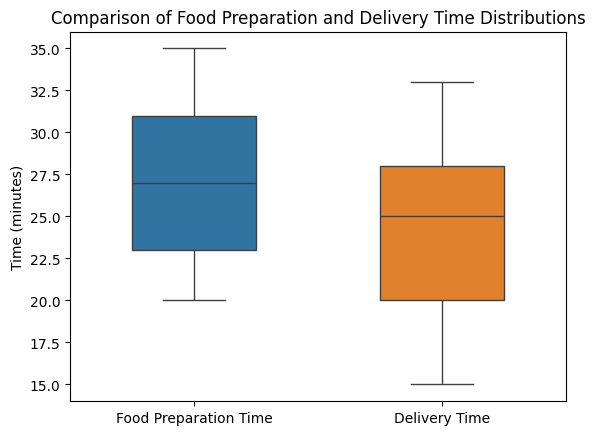

In [621]:
# Box plot of delivery_time and food_preparation_time
ax = sns.boxplot(data=df[['food_preparation_time', 'delivery_time']], width=0.5)
ax.set(xlabel='', ylabel='Time (minutes)')
labels = ['Food Preparation Time', 'Delivery Time']
ax.set_xticklabels(labels)
plt.title('Comparison of Food Preparation and Delivery Time Distributions')
plt.show()

#### Observations on the Delivery time (delivery_time):

*   The average delivery time is 24.162 minutes (24 minutes and 9 seconds), with a standard deviation of 4.97.
*   Most meals have a delivery time between 20-30 minutes.
*   Food preparation time is higher than delivery time on average, with a lower standard deviation.

In [622]:
# total_time = delivery_time + food_preparation_time - the total time between the order being placed and the food being delivered

In [623]:
# Create a new DataFrame to write total_time data
df_tt = df.copy(deep=True)
df_tt['total_time'] = df_tt['delivery_time'] + df_tt['food_preparation_time']

df_tt.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time
0,1477147,337525,Hangawi,Korean,30.750,Weekend,Not given,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,Not given,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24,49


In [624]:
# Statistical summary of the numerical variables
df_tt.describe().transpose().loc['total_time'].to_frame().transpose().head()

,count,mean,std,min,25%,50%,75%,max
total_time,1898.000,51.534,6.834,35.000,47.000,52.000,56.000,68.000


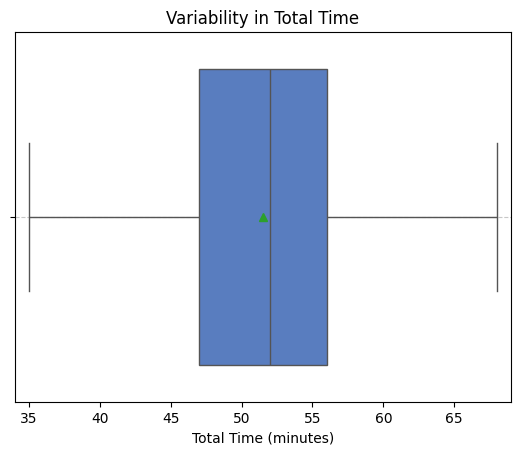

In [625]:
# Boxplot with the total time
sns.boxplot(data=df_tt,x=df_tt['total_time'], palette = "muted", showmeans=True)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Total Time (minutes)')
plt.title('Variability in Total Time')
plt.xticks(list(range(0,80,5)))
plt.xlim(34, 69)
plt.show()

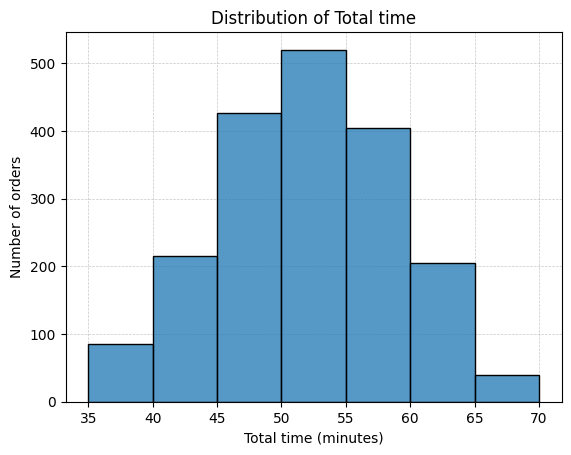

In [626]:
# Histogram of the total time (binwidth=5)
ax=sns.histplot(data=df_tt, x='total_time',zorder=2, binwidth=5, binrange=(35,70))
ax.set(xlabel='Total time (minutes)')
ax.set(ylabel='Number of orders')
plt.title('Distribution of Total time')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7, zorder=1)
plt.show()

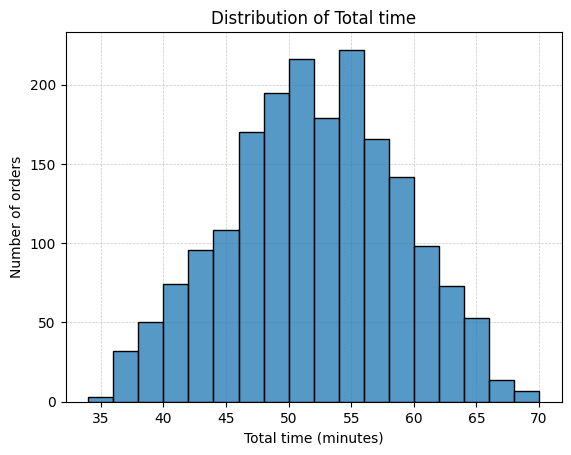

In [627]:
# Histogram of the total time (binwidth=2)
ax=sns.histplot(data=df_tt, x='total_time',zorder=2, binwidth=2, binrange=(34,70))
ax.set(xlabel='Total time (minutes)')
ax.set(ylabel='Number of orders')
plt.title('Distribution of Total time')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7, zorder=1)
plt.show()

In [628]:
# Computes the skewness of all the time distributions

# Compute skewness for food_preparation_time, delivery_time and delivery_time
skewness_food_preparation_time = skew(df_tt['food_preparation_time'])
skewness_delivery_time = skew(df_tt['delivery_time'])
skewness_total_time = skew(df_tt['total_time'])

# Print skewness values
print('> The skewness of food_preparation_time is:', round(skewness_food_preparation_time,3))
print('> The skewness of delivery_time is:', round(skewness_delivery_time,3))
print('> The skewness of total_time is:', round(skewness_total_time,3))

> The skewness of food_preparation_time is: 0.036
> The skewness of delivery_time is: -0.236
> The skewness of total_time is: -0.069


Observations on the Total time (total_time):

*   The total time (food preparation time + delivery time) has a mean of 51.53 minutes (51 minutes 32 seconds) and a standard deviation of 6.83.
*   The distribution has a Gaussian-like shape centered between 50-55 minutes when considering bins of 5 minutes.

Observations on the skewness:

*   For delivery_time the skewness is -0.236, indicating a leftward skew and a longer tail on the left side. The moderate magnitude suggests a significant departure from a symmetric distribution, with a tendency towards longer delivery times.
*   The food preparation time has a skewness value close to zero (0.036), suggesting that the distribution is approximately symmetric.
*   The total time has a negative skewness value (-0.069), lower compared to delivery_time (-0.236). This implies that the distribution is approximately symmetric.


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [629]:
# Prints the top 5 restaurants ordered by the number of orders received
df.groupby('restaurant_name')['order_id'].count().sort_values(ascending = False).reset_index(name='number_of_orders').head()

,restaurant_name,number_of_orders
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68


In [630]:
# Top 5 restaurants ordered by the total cost of orders
df_rg = df.groupby('restaurant_name')['cost_of_the_order'].sum().sort_values(ascending=False).reset_index()
df_rg.head()

,restaurant_name,cost_of_the_order
0,Shake Shack,3579.530
1,The Meatball Shop,2145.210
2,Blue Ribbon Sushi,1903.950
3,Blue Ribbon Fried Chicken,1662.290
4,Parm,1112.760


#### Observations:

*   The top-five restaurants by number of orders are: Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm. The order of restaurants remains consistent based on both the number of orders and the total cost of orders.  





### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

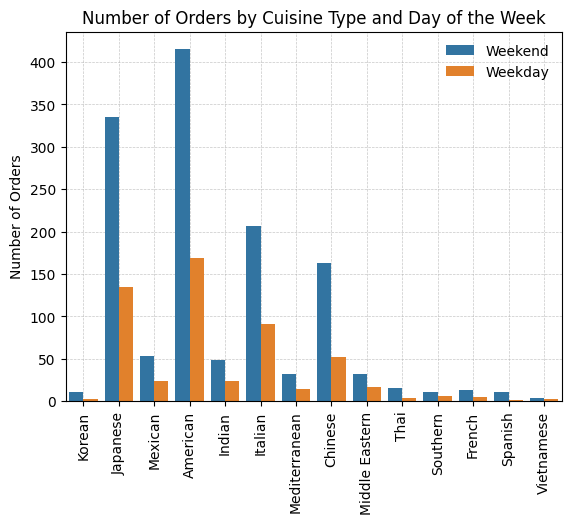

In [631]:
# Countplot of the number of orders by cuisine type and day of the week
sns.countplot(data=df,x='cuisine_type',hue='day_of_the_week', zorder=2)
plt.title('Number of Orders by Cuisine Type and Day of the Week')
plt.xlabel('')
plt.ylabel('Number of Orders')
plt.legend(frameon=False)  # Remove the box around the legend
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7, zorder=1)
plt.xticks(rotation=90)
plt.show()

In [632]:
# Subsets DataFrame for weekend orders, then counts the number of orders
df[df.day_of_the_week=='Weekend']['cuisine_type'].value_counts().reset_index(name='number_of_orders').head()

,index,number_of_orders
0,American,415
1,Japanese,335
2,Italian,207
3,Chinese,163
4,Mexican,53


In [633]:
# Subsets DataFrame for weekday orders, then counts the number of orders
df[df.day_of_the_week=='Weekday']['cuisine_type'].value_counts().reset_index(name='number_of_orders').head()

,index,number_of_orders
0,American,169
1,Japanese,135
2,Italian,91
3,Chinese,52
4,Mexican,24


#### Observations:

- The most popular cuisine type at the weekends is American.
- The top-five cuisine types for weekend orders are: American, Japanese, and Italian, Italian, Chinese and Mexican.
- This order remains during the weekdays.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [634]:
# Returns the percentage of orders with a cost greater than $20.
pc20 = round((len(df[df['cost_of_the_order'] > 20])/n_orders)*100,1)
print('> The percentage of the orders that cost more than 20 dollars is ',pc20,'%',sep='')

> The percentage of the orders that cost more than 20 dollars is 29.2%


#### Observations:

*   Approximately 29.2% of the orders have a total cost exceeding $20. This indicates a substantial portion of customers opts for higher-priced orders, showcasing a diverse range of preferences and choices in the order selections. Understanding this distribution can be valuable for strategic decision-making related to pricing strategies or targeted promotions for specific customer segments.



### **Question 10**: What is the mean order delivery time? [1 mark]

In [635]:
# Computes the mean order delivery time
mdt = round(df['delivery_time'].mean(),1)
print('> The mean delivery time is',mdt,'minutes, corresponding to',m2hms(mdt,1))

> The mean delivery time is 24.2 minutes, corresponding to 24 m. 12 s.


#### Observations:

- The mean delivery time is 24.2 minutes (24 minutes and 12 seconds).

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [636]:
# Returns the number of orders of the top 3 most frequent customers
df['customer_id'].value_counts().reset_index(name='number_of_orders').rename(columns={'index': 'customer_id'}).head(3)

,customer_id,number_of_orders
0,52832,13
1,47440,10
2,83287,9


#### Observations:

- The IDs of the top-three customers are 52832 (15 orders), 47440 (10 orders) and 83287 (9 orders).

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [637]:
# Correlations

In [638]:
# Create a DataFrame with numerical ratings (Not given = 0), numerical day of the week (0: Weekend; 1: Weekday) and total time

# Copy df_tt
df_ttr = df_tt.copy()

# copy rating column for ploting
df_ttr['rating_text'] = df_ttr['rating']

# Replace "Not given" with 0 in the 'rating' column. Set the data type as integer
df_ttr['rating'] = df_ttr['rating'].replace('Not given', 0)
df_ttr['rating'] = df_ttr['rating'].astype(int)

# copy column for ploting
df_ttr['day_of_the_week_text'] = df_ttr['day_of_the_week']

# Replace day_of_the_week
df_ttr['day_of_the_week'] = pd.factorize(df_ttr['day_of_the_week'])[0]

# print the first 5 rows
df_ttr.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time,rating_text,day_of_the_week_text
0,1477147,337525,Hangawi,Korean,30.750,0,0,25,20,45,Not given,Weekend
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,0,0,25,23,48,Not given,Weekend
2,1477070,66393,Cafe Habana,Mexican,12.230,1,5,23,28,51,5,Weekday
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,0,3,25,15,40,3,Weekend
4,1478249,76942,Dirty Bird to Go,American,11.590,1,4,25,24,49,4,Weekday


#### Observations:

- The variables "order_id," "customer_id," "restaurant_name," and "cuisine_type" serve as identifiers and represent categorical variables. These variables hold numerous distinct values, making them unsuitable for correlation calculations.
- The variable "rating" was transformed into a numerical variable to facilitate quantitative analysis. Ratings have meaningful order, allowing for calculations such as averages and correlations. The "Non given" value was converted to 0, enabling a clear numerical representation while accounting for cases where customers did not provide a rating.
- The 'day_of_the_week' variable was transformed into a binary format to facilitate analysis. This conversion resulted in a binary variable where 0 represents the weekend, and 1 represents weekdays. This transformation simplifies the representation of the day of the week, making it easier to explore numerical relationships with other variables. An average value of the binary 'day_of_the_week' variable provides insights into the overall tendency for orders to be placed on weekdays (closer to 1) or weekends (closer to 0).


<Figure size 2000x700 with 0 Axes>

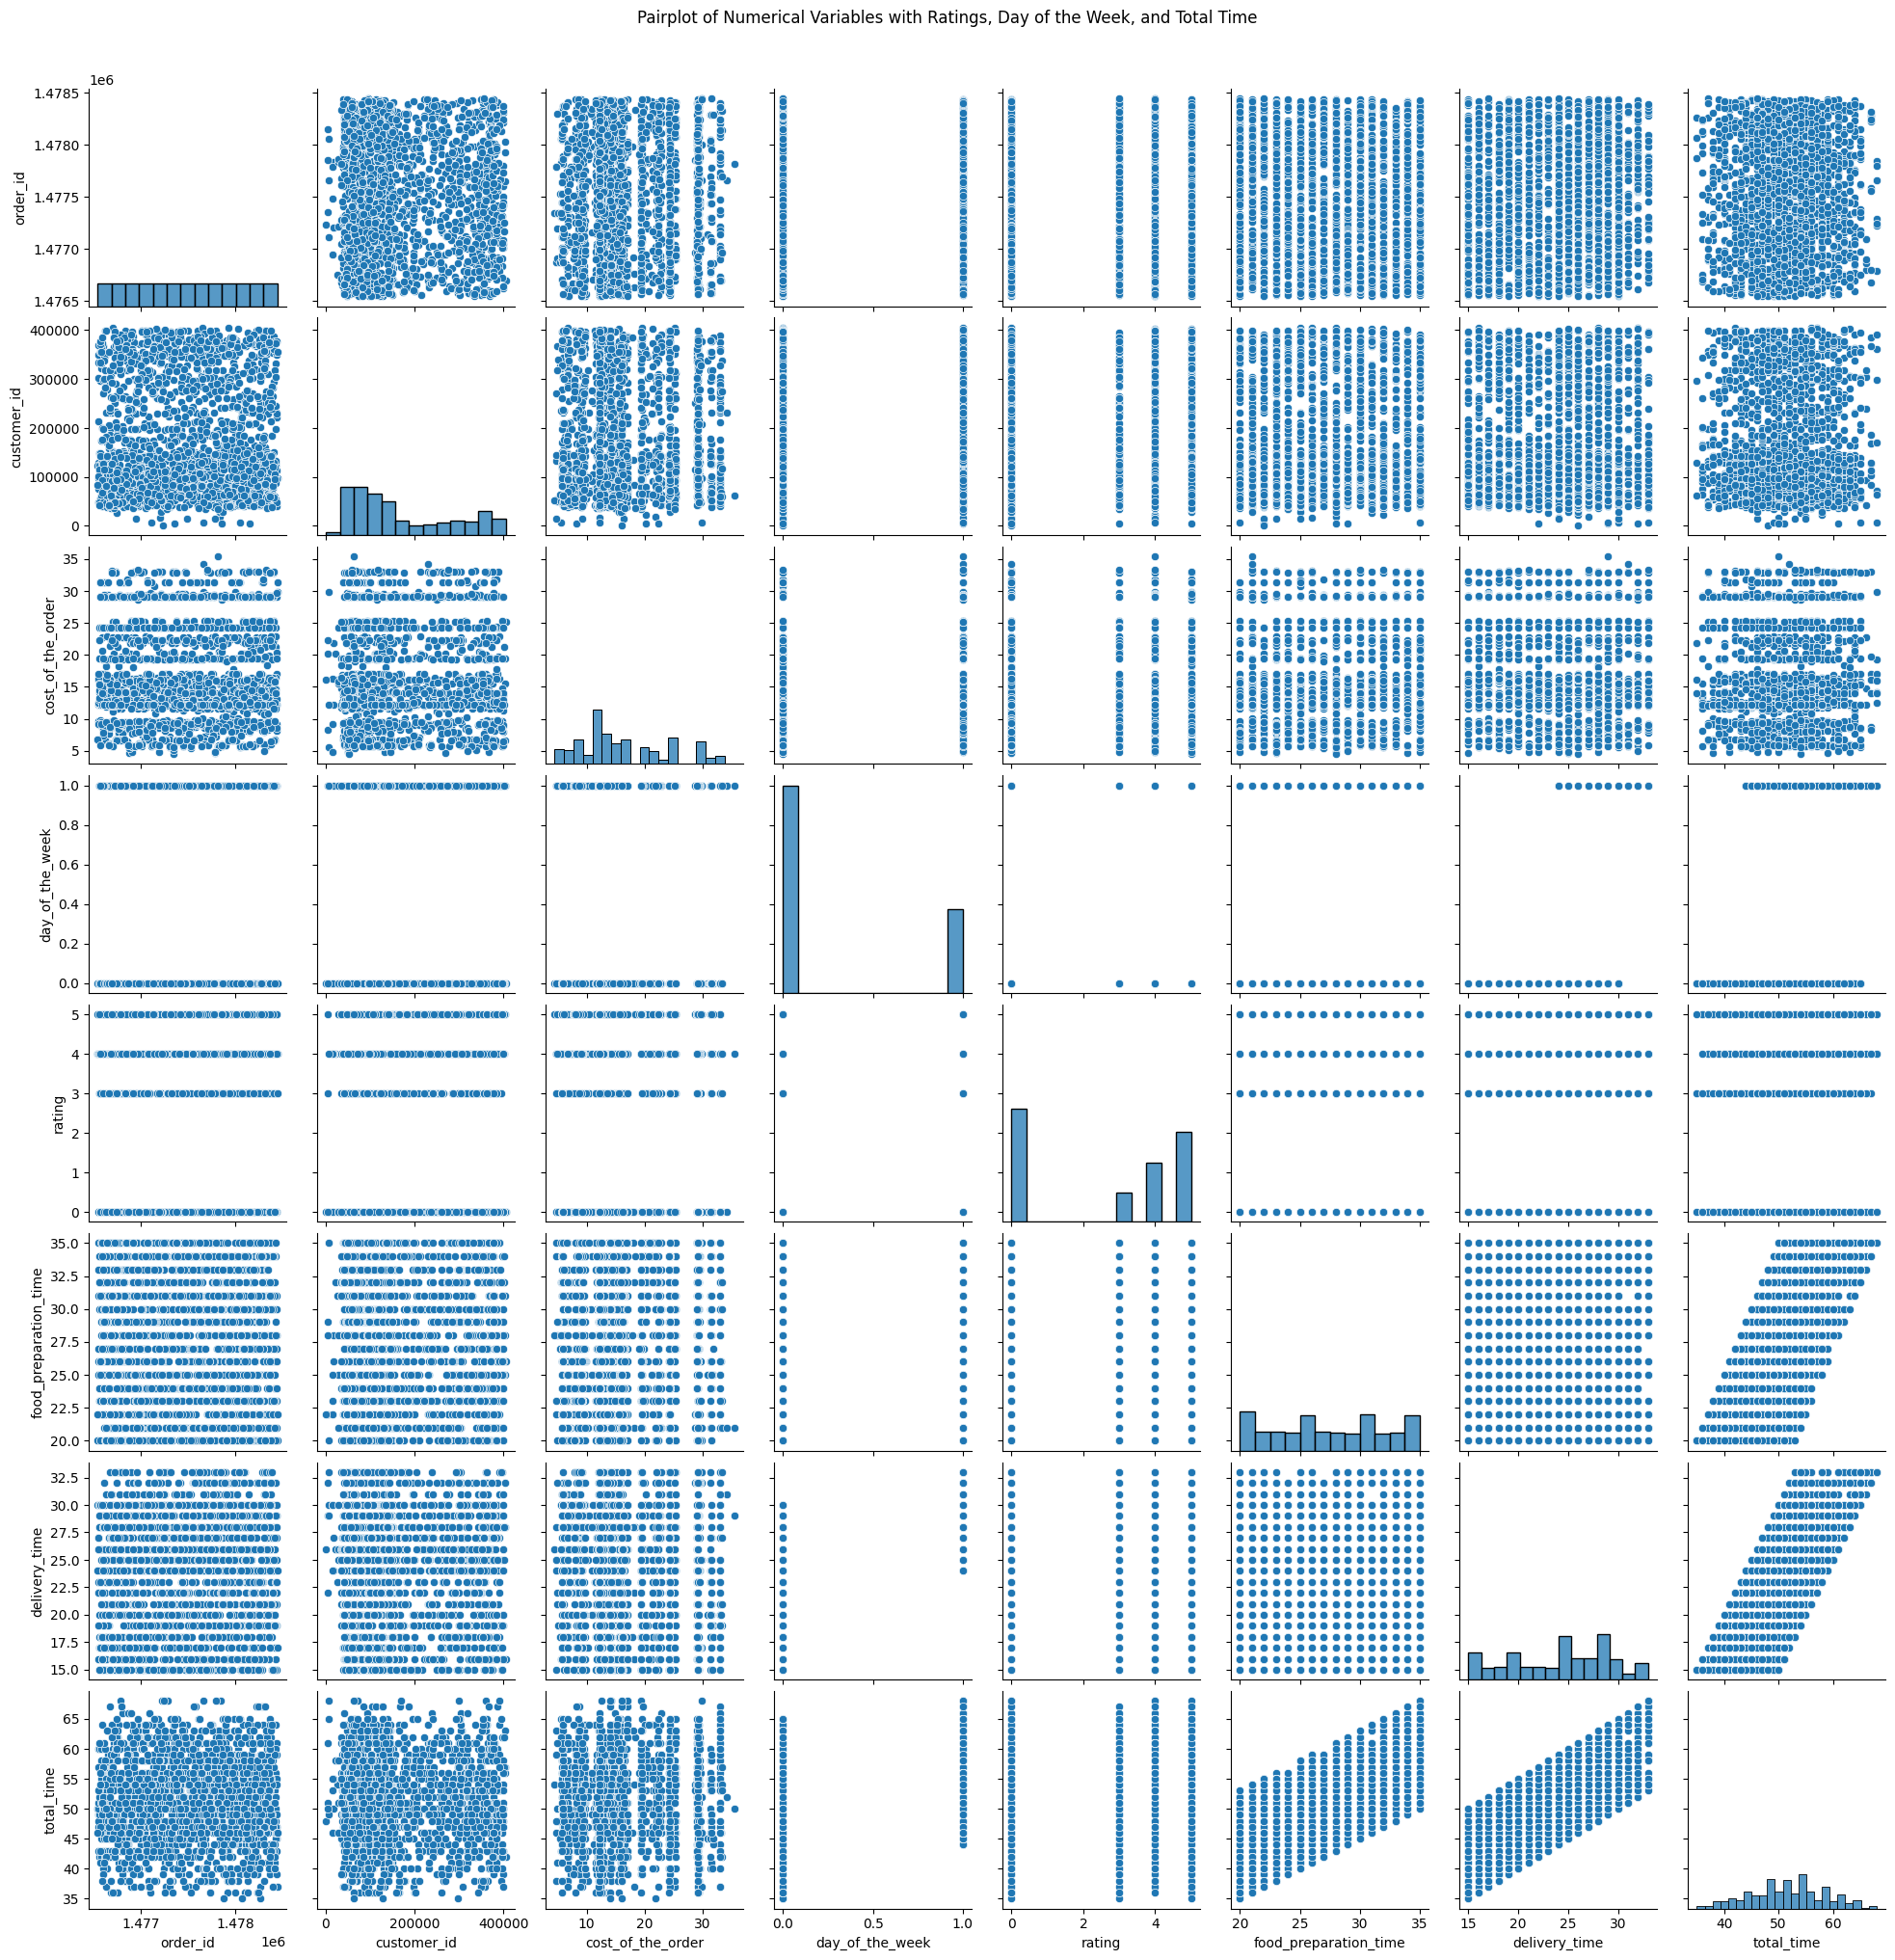

In [639]:
# Returns the pairplot of the dataset
plt.figure(figsize=(20, 7))
sns.pairplot(data=df_ttr)
plt.suptitle("Pairplot of Numerical Variables with Ratings, Day of the Week, and Total Time", y=1.02)
plt.show()

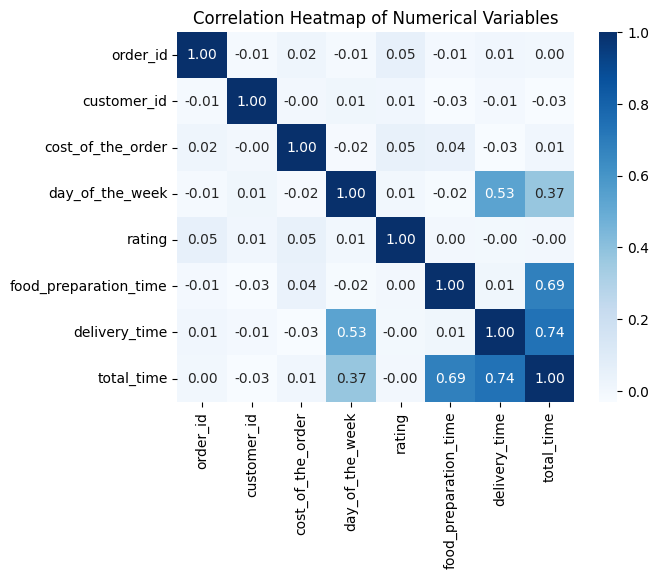

In [640]:
# Returns the heatmap of the df_ttr dataset with annotations inside the squares
corr = df_ttr.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='Blues')
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

#### Observations:

- Initially, it was expected that the rating would exhibit correlations with variables such as the cost of the order or total time. However, the results of the multivariate analysis indicate no significant correlations between the rating and any of the variables provided by FoodHub.
- A relatively strong correlation exists between total time, delivery time, and food preparation time, with a correlation coefficient greater than or equal to 0.7. This correlation is expected, as total time is directly calculated as the sum of delivery time (which exhibits an asymmetric distribution) and food preparation time (which has an approximately symmetrical distribution).
- A notable correlation is observed between the day of the week and both delivery time (0.53) and total time (0.37). However, no significant correlation is found between the day of the week and food preparation time. This suggests a potential influence of the day of the week on the delivery process and the overall time required for order fulfillment.


In [641]:
# Cost of the order and total time by rating

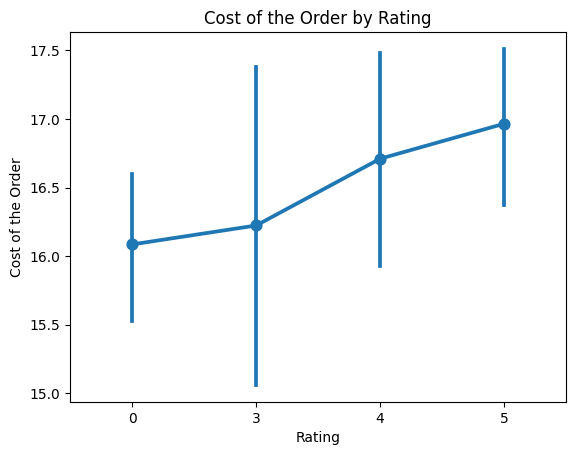

In [642]:
# Cost of the order by rating
ax = sns.pointplot(data=df_ttr, x='rating', y='cost_of_the_order', order=sorted(df_ttr['rating'].unique()))
ax.set(xlabel='Rating', ylabel='Cost of the Order', title='Cost of the Order by Rating')
plt.show()

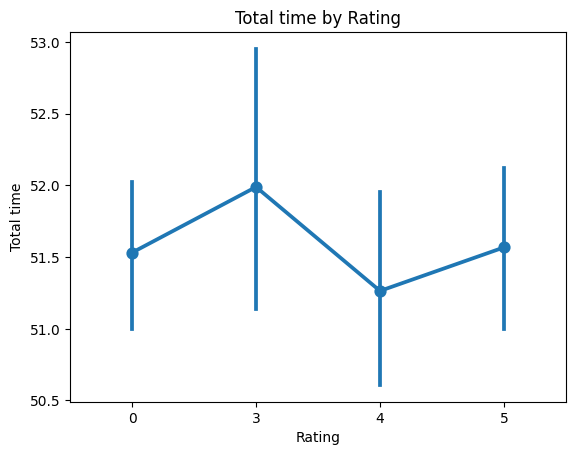

In [643]:
# Total time by rating
ax = sns.pointplot(data=df_ttr, x='rating', y='total_time', order=sorted(df_ttr['rating'].unique()))
ax.set(xlabel='Rating', ylabel='Total time', title='Total time by Rating')
plt.show()

#### Observations:

- Higher ratings are associated with higher mean order costs, suggesting a perceived correlation between elevated prices and better quality. Conversely, lower ratings tend to be linked with lower mean order costs or cases where no rating was provided. This trend is reflected in a difference of means of approximately $1. It's important to note that this inference is based on observed trends, and individual preferences may vary.

- Contrary to the observed association with the mean order cost, there is no significant relationship between the rating and the mean total time of the order.





In [644]:
# Distributions

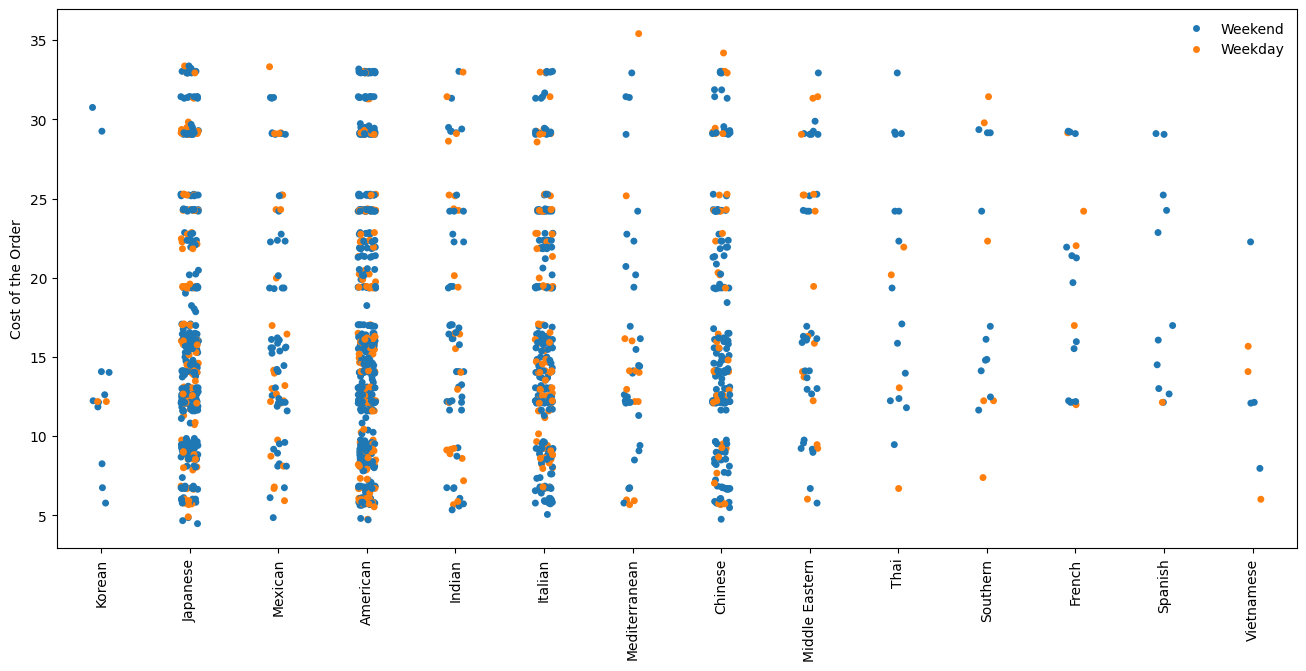

In [645]:
# Cost of the order by cuisine type and day of the week
plt.figure(figsize=(16, 7))
ax = sns.stripplot(data=df, x='cuisine_type', y="cost_of_the_order", hue='day_of_the_week')
ax.set(xlabel='', ylabel='Cost of the Order')
plt.xticks(rotation=90)
ax.legend(title='', frameon=False)
plt.show()

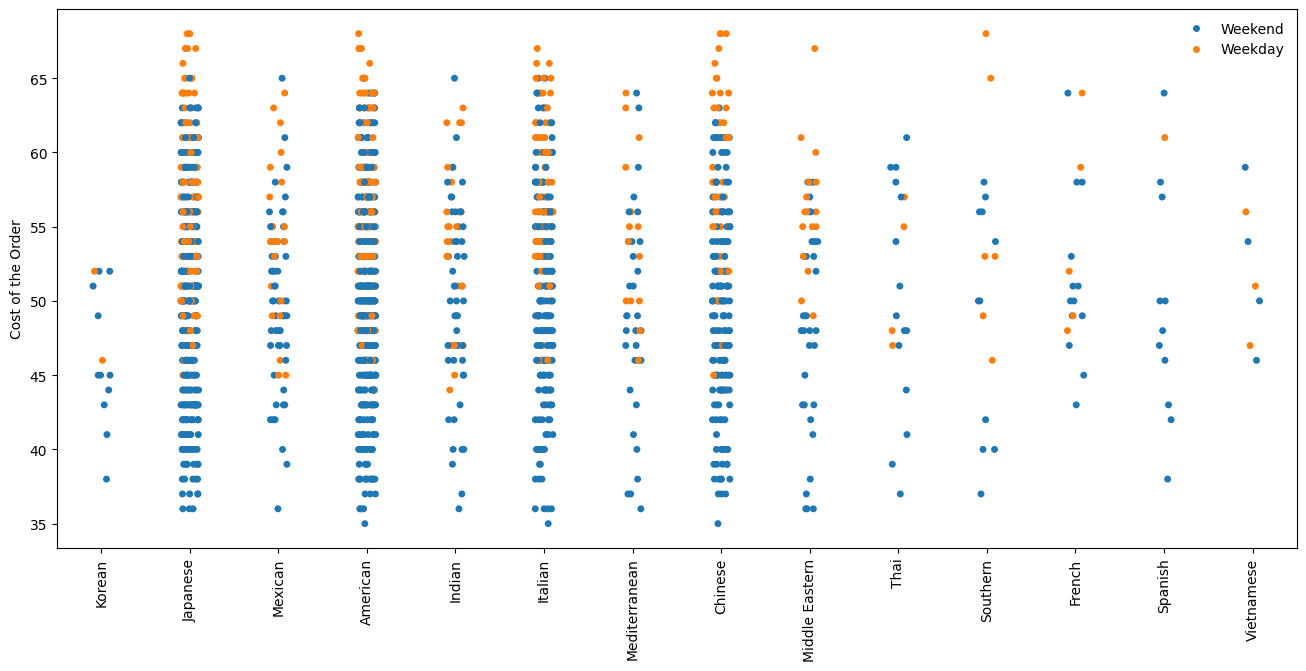

In [646]:
# Total time by cuisine type and day of the week
plt.figure(figsize=(16, 7))
ax = sns.stripplot(data=df_ttr, x='cuisine_type', y="total_time", hue='day_of_the_week_text')
ax.set(xlabel='', ylabel='Cost of the Order')
plt.xticks(rotation=90)
ax.legend(title='', frameon=False)
plt.show()

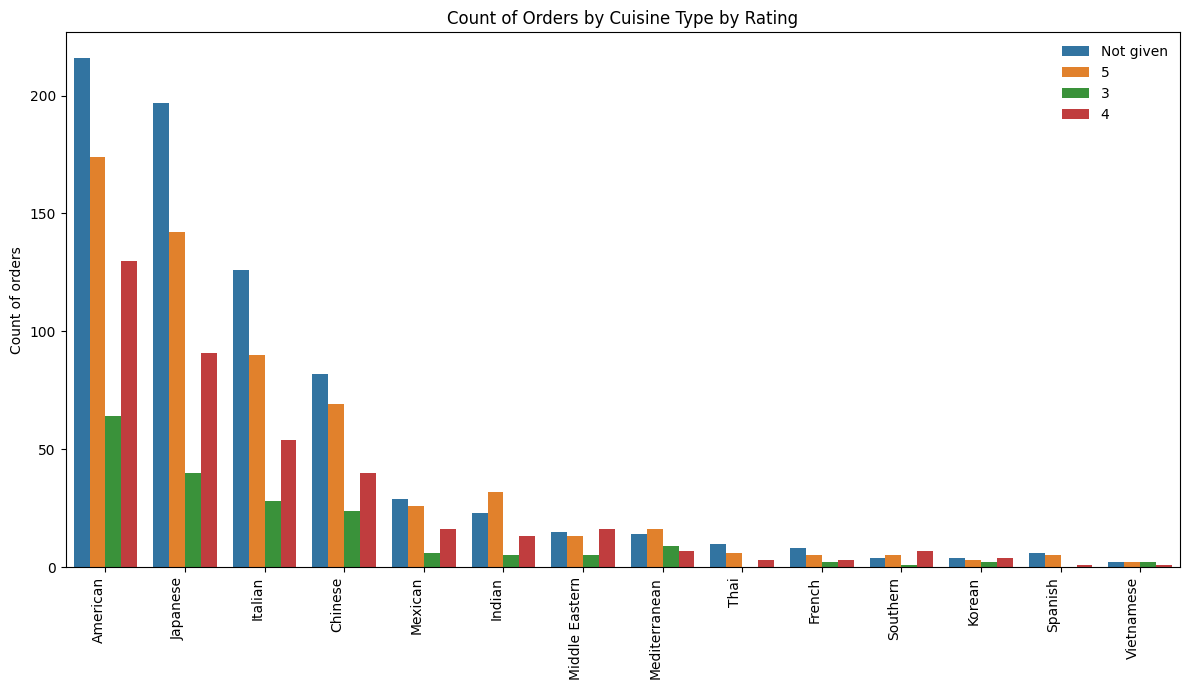

In [647]:
# Count of Orders by Cuisine Type by Rating
plt.figure(figsize=(12, 7))
plot = sns.countplot(data=df, x='cuisine_type', hue='rating', order=df['cuisine_type'].value_counts().index)
plt.title('Count of Orders by Cuisine Type by Rating')
plot.set(xlabel='', ylabel='Count of orders')
plot.legend(title=None)
plot.get_legend().set_frame_on(False)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

#### Observations:

- The dataset currently lacks ample data for certain cuisine types, notably Korean, Thai, Southern, French, Spanish, and Vietnamese. In order to derive more robust statistical insights and trends for these specific cuisines and their respective restaurants, it is essential to acquire additional data. Moreover, a more extensive dataset would enhance the analysis for relatively well-represented cuisines, such as Mexican, Indian, Mediterranean, and Middle Eastern.
- Notably, the culinary preferences exhibit a consistent pattern across different weekdays and ratings. Regardless of the specific day of the week or the given rating, certain cuisines consistently rank as more popular or frequently ordered. This indicates a stable demand for these top cuisines despite of variations in weekdays or customer ratings.
- While the preference for specific cuisines remains consistent, there is a impact on overall demand during weekdays.







In [648]:
# Combinations of 3 variables
variables = ['cuisine_type','cost_of_the_order','day_of_the_week',
             'rating','food_preparation_time','delivery_time','total_time']

# Generate all combinations of 3 variables
combinations = list(itertools.combinations(variables, 3))

# Convert combinations to a list of strings
combinations_strings = [' - '.join(combination) for combination in combinations]

# Print the list of combinations to select the interesting ones
print('> List of all the combinations of 3 variables to select the interesting combinations:')
for combination in combinations_strings:
    print(combination)

> List of all the combinations of 3 variables to select the interesting combinations:
cuisine_type - cost_of_the_order - day_of_the_week
cuisine_type - cost_of_the_order - rating
cuisine_type - cost_of_the_order - food_preparation_time
cuisine_type - cost_of_the_order - delivery_time
cuisine_type - cost_of_the_order - total_time
cuisine_type - day_of_the_week - rating
cuisine_type - day_of_the_week - food_preparation_time
cuisine_type - day_of_the_week - delivery_time
cuisine_type - day_of_the_week - total_time
cuisine_type - rating - food_preparation_time
cuisine_type - rating - delivery_time
cuisine_type - rating - total_time
cuisine_type - food_preparation_time - delivery_time
cuisine_type - food_preparation_time - total_time
cuisine_type - delivery_time - total_time
cost_of_the_order - day_of_the_week - rating
cost_of_the_order - day_of_the_week - food_preparation_time
cost_of_the_order - day_of_the_week - delivery_time
cost_of_the_order - day_of_the_week - total_time
cost_of_the_o

In [649]:
# cuisine_type - cost_of_the_order - day_of_the_week

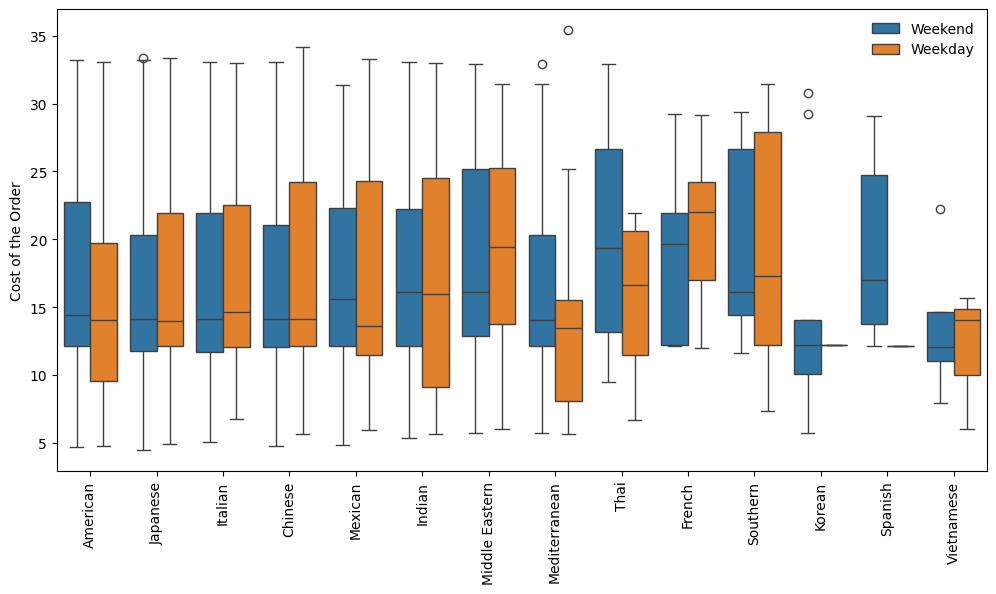

In [650]:
# Cost of the order by cuisine type and day of the week
plt.figure(figsize=(12,6))
ax = sns.boxplot(data = df_ttr, x = 'cuisine_type', y = 'cost_of_the_order',hue='day_of_the_week_text',order=df_ttr['cuisine_type'].value_counts().index)
plt.xticks(rotation = 90)
ax.set(xlabel='', ylabel='Cost of the Order')
plt.legend(title=None, frameon=False)
plt.show()

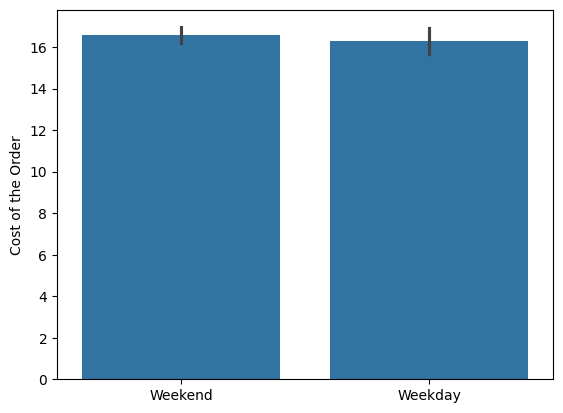

In [651]:
# Barplot of the cost of the order
ax = sns.barplot(data = df, x = 'day_of_the_week', y = 'cost_of_the_order')
ax.set(xlabel='', ylabel='Cost of the Order')
plt.show()

#### Observations:

- The analysis reveals that there is no substantial difference in the mean cost of orders between weekdays and weekends. On both types of days, customers tend to spend a similar amount on their food orders.

In [652]:
# cuisine_type - cost_of_the_order - rating

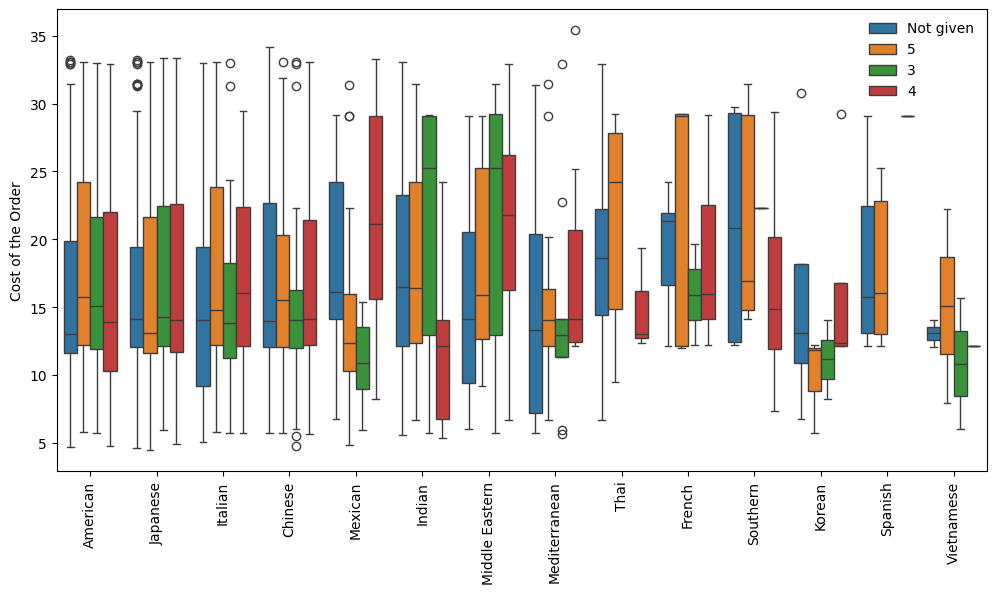

In [653]:
# Cost_of_the_order by cuisine type and rating
plt.figure(figsize=(12,6))
ax = sns.boxplot(data = df_ttr, x = 'cuisine_type', y = 'cost_of_the_order',hue='rating_text',order=df_ttr['cuisine_type'].value_counts().index)
plt.xticks(rotation = 90)
plt.legend(title=None, frameon=False)
ax.set(xlabel='', ylabel='Cost of the Order')
plt.show()

#### Observations:

- The analysis of the top 4 restaurants, based on the number of orders, reveals that the maximum rating doesn't show a significant relationship with either the cost of the order or the cuisine type, despite with the exception of the Japanese cuisine the 4 or 5 ratings have higher cost of the order.

- Within Mexican cuisine restaurants, an interesting trend emerges. Higher-priced food items tend to receive a rating of 4, while more affordable options tend to receive other ratings. This specific association might indicate a perceived value or satisfaction in the mid-range cost bracket within this cuisine type.

- In contrast, for Indian and Middle Eastern restaurants, higher costs of orders are associated with lower ratings. This observation raises questions about the perceived value or satisfaction for higher-priced orders within these specific culinary categories. Further exploration is needed to understand customer expectations and experiences in these establishments, including information on the restaurant names and food types. Evaluating the price/quality ratio can provide insights into customer expectations and guide strategic decisions related to pricing and service improvement.

- The cuisine types with lower numbers of orders prevents a comprehensive understanding of customer behaviors and preferences within these specific categories.

In [654]:
# cuisine_type - day_of_the_week - food_preparation_time

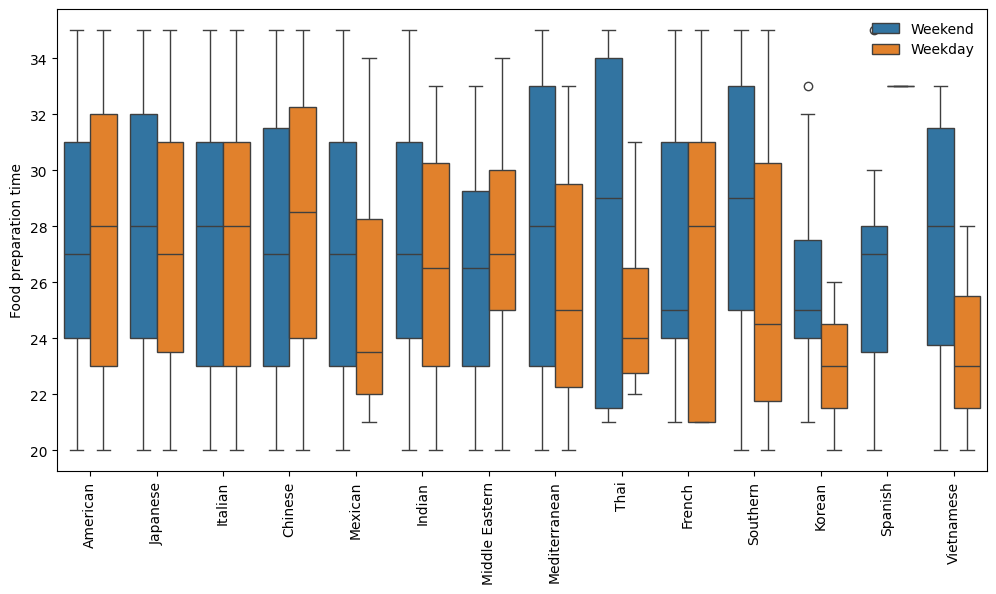

In [655]:
# Food preparation time by cuisine type and day of the week
plt.figure(figsize=(12,6))
ax = sns.boxplot(data = df_ttr, x = 'cuisine_type', y = 'food_preparation_time',hue='day_of_the_week_text',order=df_ttr['cuisine_type'].value_counts().index)
plt.xticks(rotation = 90)
plt.legend(title=None, frameon=False)
ax.set(xlabel='', ylabel='Food preparation time')
plt.show()

#### Observations:

- The analysis reveals distinct patterns in food preparation time based on both cuisine types and weekdays. Notably, the Mexican, Mediterranean, French, Korean, and Vietnamese cuisines exhibit higher food preparation times during the weekends compared to weekdays. This suggests that, for these specific cuisines, the preparation process tends to take longer on weekends, potentially influenced by factors such as increased demand or kitchen operations.

- Conversely, when focusing on the top restaurants, there is no significant difference in food preparation time between weekdays. This suggests a consistent and efficient food preparation process throughout the week.

In [656]:
# cuisine_type - day_of_the_week - delivery_time

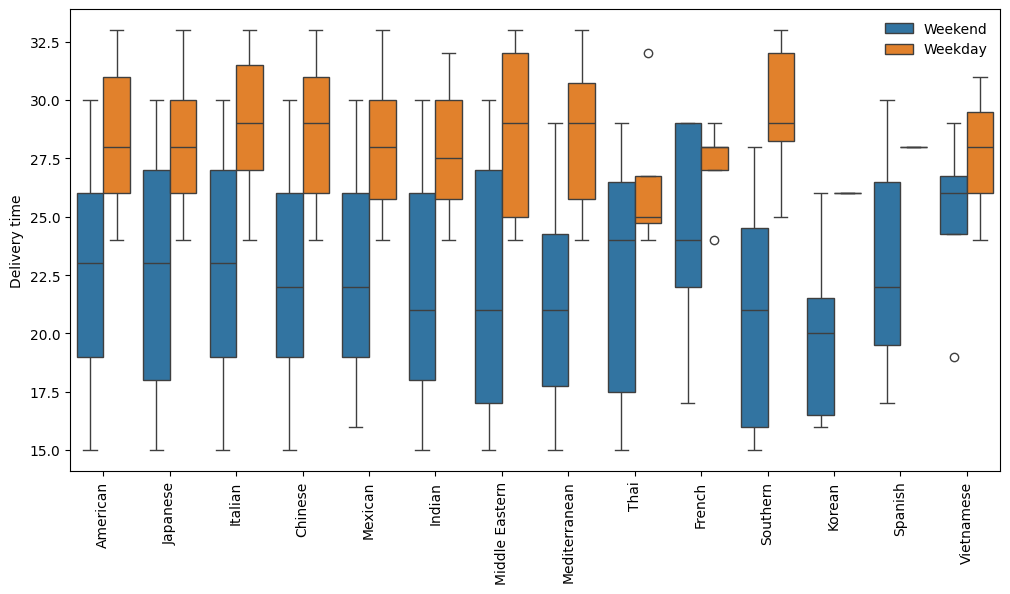

In [657]:
# Delivery time by cuisine type and day of the week
plt.figure(figsize=(12,6))
ax = sns.boxplot(data = df_ttr, x = 'cuisine_type', y = 'delivery_time', hue='day_of_the_week_text',order=df_ttr['cuisine_type'].value_counts().index)
plt.xticks(rotation = 90)
plt.legend(title=None, frameon=False)
ax.set(xlabel='', ylabel='Delivery time')
plt.show()

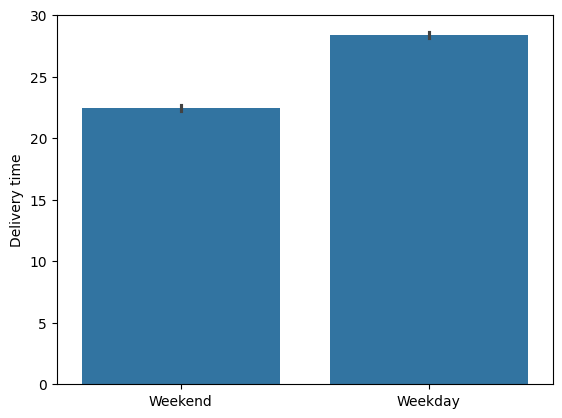

In [658]:
# Barplot of the cost of the order
ax = sns.barplot(data = df, x = 'day_of_the_week', y = 'delivery_time')
ax.set(xlabel='', ylabel='Delivery time')
plt.show()

#### Observations:

- Delivery time tends to be higher during weekdays despite the a substancial difference in the number of orders during the weekends, suggesting a potential influence from external factors such as traffic.

In [659]:
# cuisine_type - day_of_the_week - total_time

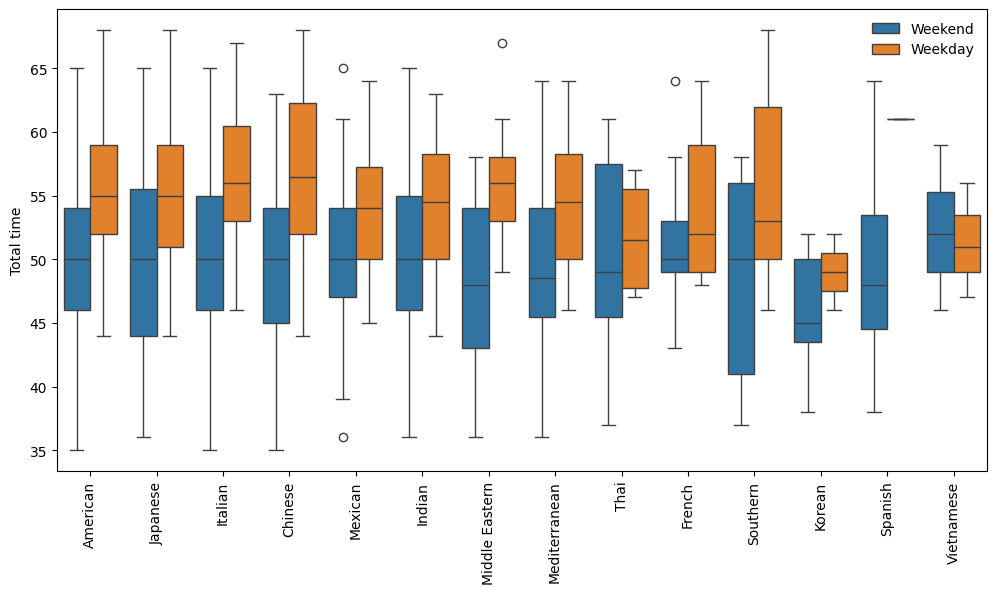

In [660]:
# Total time time by cuisine type and day of the week
plt.figure(figsize=(12,6))
ax = sns.boxplot(data = df_ttr, x = 'cuisine_type', y = 'total_time', hue='day_of_the_week_text',order=df_ttr['cuisine_type'].value_counts().index)
plt.xticks(rotation = 90)
plt.legend(title=None, frameon=False)
ax.set(xlabel='', ylabel='Total time')
plt.show()

#### Observations:

- There is a consistent trend indicating higher total times during the weekends across all cuisine types.


In [661]:
# cuisine_type - rating - food_preparation_time

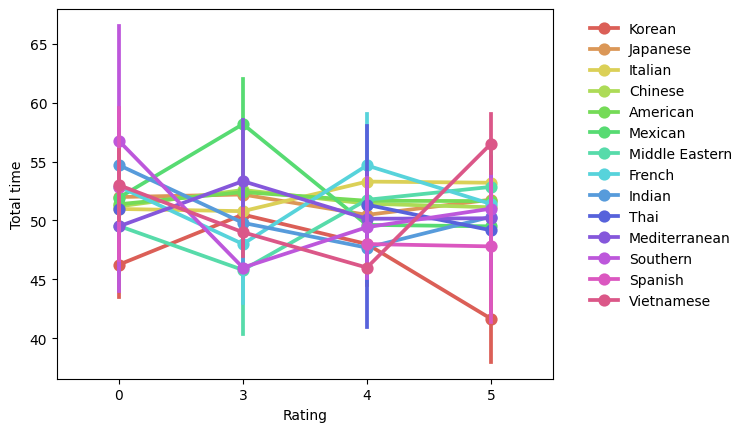

In [662]:
# Food preparation rating and by cuisine type
rating_order = sorted(df_ttr['rating'].unique())
ax = sns.pointplot(data = df_ttr,x = 'rating', y = 'total_time',hue='cuisine_type',order=rating_order, palette = 'hls')
ax.legend(title='', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.get_legend().set_frame_on(False)
ax.set_xlabel('Rating')
ax.set_ylabel('Total time')
plt.show()

#### Observations:

- Mexican cuisine orders with a rating of 3 exhibit a tendency to higher total times compared to other cuisine types. Analyzing components such as food preparation time and delivery time for Mexican cuisine with a rating of 3 can provide valuable insights into potential operational or logistical challenges specific to this scenario.



In [663]:
# cost_of_the_order - day_of_the_week - rating

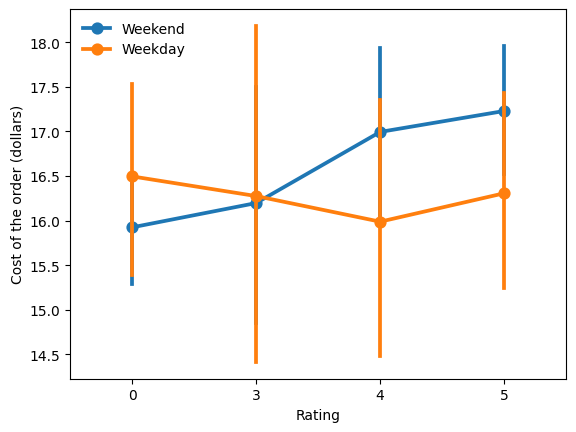

In [664]:
# Food preparation rating and by cuisine type
rating_order = sorted(df_ttr['rating'].unique())
ax = sns.pointplot(data = df_ttr,x = 'rating', y = 'cost_of_the_order',hue='day_of_the_week_text',order=rating_order)
plt.legend(title=None, frameon=False)
ax.get_legend().set_frame_on(False)
ax.set_xlabel('Rating')
ax.set_ylabel('Cost of the order (dollars)')
plt.show()

In [665]:
# day_of_the_week - rating - food_preparation_time

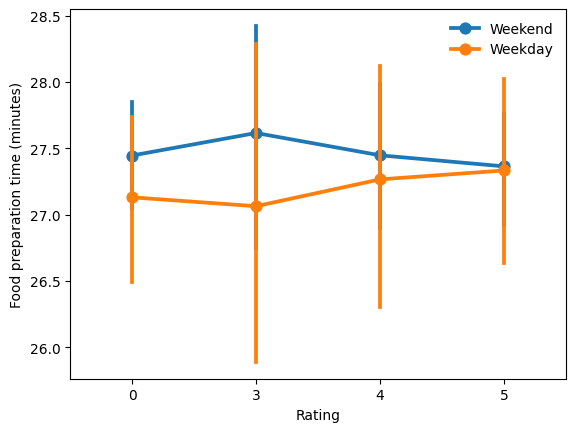

In [666]:
# Preparation time by rating and day of the week
rating_order = sorted(df_ttr['rating'].unique())
ax = sns.pointplot(data = df_ttr,x = 'rating', y = 'food_preparation_time',hue='day_of_the_week_text',order=rating_order)
ax.legend(title='')
ax.set_xlabel('Rating')
ax.set_ylabel('Food preparation time (minutes)')
ax.get_legend().set_frame_on(False)
plt.show()

In [667]:
# day_of_the_week - rating - delivery_time

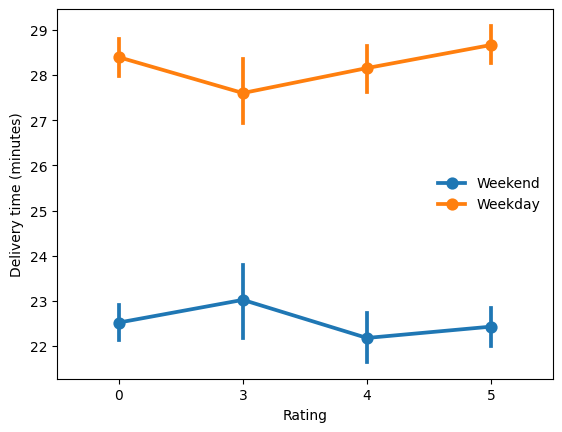

In [668]:
# Delivery time by rating and day of the week
rating_order = sorted(df_ttr['rating'].unique())
ax = sns.pointplot(data = df_ttr,x = 'rating', y = 'delivery_time',hue='day_of_the_week_text',order=rating_order)
ax.legend(title='')
ax.set_xlabel('Rating')
ax.set_ylabel('Delivery time (minutes)')
ax.get_legend().set_frame_on(False)
plt.show()

In [669]:
# day_of_the_week - rating - total_time

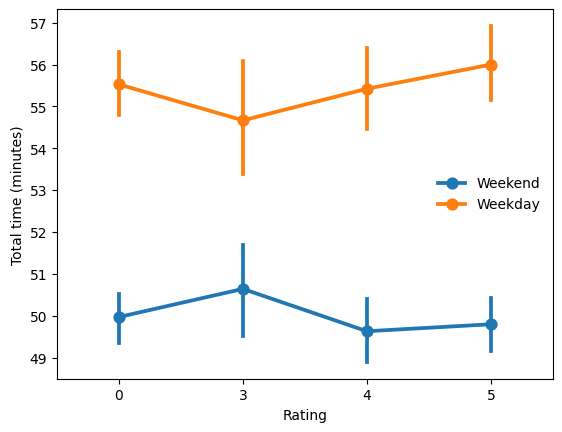

In [670]:
# Total time by rating and day of the week
rating_order = sorted(df_ttr['rating'].unique())
ax = sns.pointplot(data = df_ttr,x = 'rating', y = 'total_time',hue='day_of_the_week_text',order=rating_order)
ax.legend(title='')
ax.set_xlabel('Rating')
ax.set_ylabel('Total time (minutes)')
ax.get_legend().set_frame_on(False)
plt.show()

#### Observations:

- The analysis indicates a slight tendency during the weekend for customers to associate higher ratings (4 and 5) with higher prices, with a difference of approximately 1 dollar. However, this association is not observed as prominently during weekdays or for lower ratings (0 and 3). This nuanced relationship between ratings and prices on weekends suggests a potential influence of customer preferences or behaviors during specific periods.

In [671]:
# Mean and std values

In [672]:
# Mean and std values grouped by restaurant name
df_sorted = df_ttr.sort_values(by='restaurant_name')
df_sc = df_sorted[['restaurant_name','cost_of_the_order','day_of_the_week','rating','food_preparation_time','delivery_time','total_time']]
mean_values_by_restaurant = df_sc.groupby('restaurant_name').mean()
mean_values_by_restaurant.head()

,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time
restaurant_name,,,,,,
'wichcraft,8.100,1.000,5.000,28.000,28.000,56.000
12 Chairs,22.142,0.500,2.250,27.000,27.750,54.750
5 Napkin Burger,15.968,0.400,1.600,30.200,24.400,54.600
67 Burger,29.050,1.000,5.000,20.000,28.000,48.000
Alidoro,12.610,0.000,0.000,34.000,22.000,56.000


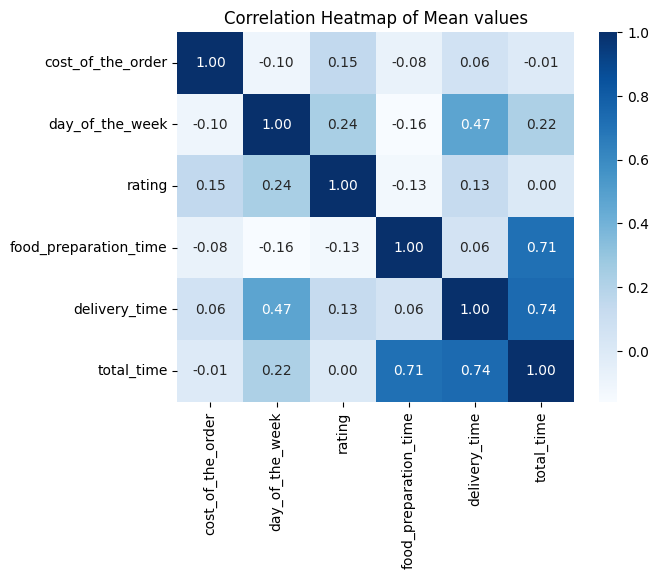

In [673]:
# Correlation heatmap of mean values. Values grouped by restaurant name
corr = mean_values_by_restaurant.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='Blues')
plt.title("Correlation Heatmap of Mean values")
plt.show()

#### Observations:

- When examining restaurants grouped by name, a notable level of correlation emerges between the rating and four mean values: the cost of the order, the day of the week (representing the tendency of a restaurant to have weekday or weekend orders), the food preparation time, and the delivery time. However, no significant correlation is observed with the mean total time.

In [674]:
# Mean and std values grouped by cuisine type
df_sorted = df_ttr.sort_values(by='cuisine_type')
df_sc = df_sorted[['cuisine_type','cost_of_the_order','day_of_the_week','rating','food_preparation_time','delivery_time','total_time']]
mean_values_by_cuisine_type = df_sc .groupby('cuisine_type').mean()
std_values_by_cuisine_type = df_sc .groupby('cuisine_type').std()
mean_values_by_cuisine_type.head()

,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time
cuisine_type,,,,,,
American,16.320,0.289,2.709,27.440,24.193,51.634
Chinese,16.305,0.242,2.684,27.512,23.856,51.367
French,19.794,0.278,2.389,26.889,25.333,52.222
Indian,16.920,0.329,3.110,27.110,24.082,51.192
Italian,16.419,0.305,2.517,27.483,24.567,52.050


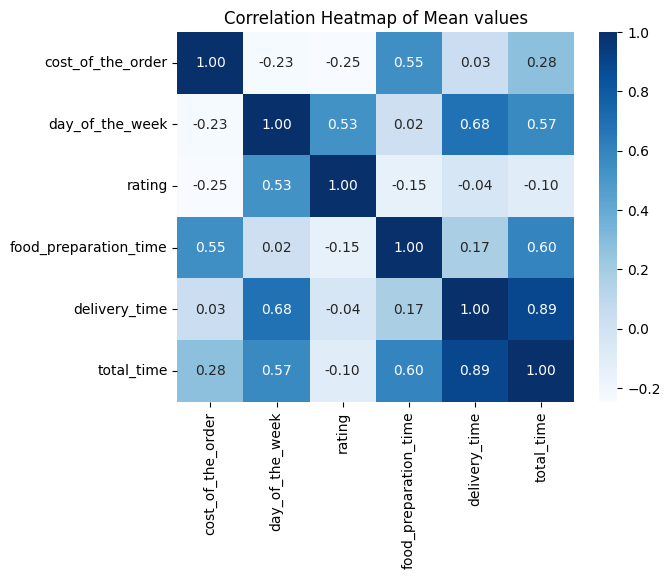

In [675]:
# Correlation heatmap of mean values. Values grouped by cuisine type
corr = mean_values_by_cuisine_type.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='Blues')
plt.title("Correlation Heatmap of Mean values")
plt.show()

#### Observations:

- When examining restaurants grouped by cuisine type, a higher level of correlation is observed between the rating and three mean values: the mean cost of the order, the mean total time, and the day of the week. Additionally, there is a significant correlation between the mean food preparation time or total time and the mean cost of the order within each cuisine type. This suggests that customer ratings may have an impact on both the perceived value of the order (reflected in the cost) and the efficiency of the order fulfillment process.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [676]:
# Removes orders with rating = 0
df_ttr_r0 = df_ttr[df_ttr['rating'] > 0]
df_ttr_r0.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time,rating_text,day_of_the_week_text
2,1477070,66393,Cafe Habana,Mexican,12.230,1,5,23,28,51,5,Weekday
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,0,3,25,15,40,3,Weekend
4,1478249,76942,Dirty Bird to Go,American,11.590,1,4,25,24,49,4,Weekday
5,1477224,147468,Tamarind TriBeCa,Indian,25.220,1,3,20,24,44,3,Weekday
7,1477859,89574,Barbounia,Mediterranean,5.970,1,3,33,30,63,3,Weekday


In [677]:
# Filter out restaurants with order count <= 50
df_ttr_r0_r50 = df_ttr_r0[df_ttr_r0.groupby('restaurant_name')['rating'].transform('count') > 50]
df_ttr_r0_r50.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time,rating_text,day_of_the_week_text
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,0,3,25,15,40,3,Weekend
12,1476966,129969,Blue Ribbon Fried Chicken,American,24.300,0,5,23,17,40,5,Weekend
15,1477414,66222,Shake Shack,American,16.200,0,5,33,25,58,5,Weekend
19,1477354,67487,Blue Ribbon Sushi,Japanese,16.200,0,4,35,26,61,4,Weekend
22,1478287,150599,Shake Shack,American,29.100,1,5,21,30,51,5,Weekday


In [678]:
# Sorted by the mean order
df_ttr_r0_r50_sm = df_ttr_r0_r50.groupby('restaurant_name')['rating'].mean().sort_values(ascending=False).reset_index()
df_ttr_r0_r50_sm[df_ttr_r0_r50_sm['rating'] >= 4].head()

,restaurant_name,rating
0,The Meatball Shop,4.512
1,Blue Ribbon Fried Chicken,4.328
2,Shake Shack,4.278
3,Blue Ribbon Sushi,4.219


In [679]:
# Print the number of restaurants that fullfil the conditions
print('> The number of restaurants that fullfil the conditions is',len(df_ttr_r0_r50_sm[df_ttr_r0_r50_sm['rating'] >= 4]))

> The number of restaurants that fullfil the conditions is 4


#### Observations:

- The following establishments fulfil the criteria for the promotional offer, requiring a rating count exceeding 50 and an average rating greater than 4: Shake Shack, The Meatball Shop, Blue Ribbon Sushi, and Blue Ribbon Fried Chicken.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [680]:
# Calculation of the net_revenue for the orders having cost greater than 20 dollars
df_gt20 = df[df['cost_of_the_order'] > 20]
net_revenue_gt20 = 0.25 * df_gt20['cost_of_the_order'].sum()

# Calculation of the net_revenue for the orders having cost greater than 5 dollars
df_leqt20 = df[df['cost_of_the_order'] <= 20]
df_leqt20_gt5 = df_leqt20[df_leqt20['cost_of_the_order'] > 5]
net_revenue_leqt20_gt5 = 0.15 * df_leqt20_gt5['cost_of_the_order'].sum()

# Sum the revenues
net_revenue = net_revenue_gt20 + net_revenue_leqt20_gt5

# Print the result
print('> The total net revenue is',round(net_revenue,2),'dollars.')

> The total net revenue is 6166.3 dollars.


#### Observations:

- The net revenue generated by the company across all orders is 6166.30 dollars.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [681]:
# Calculate the total number of orders that take more than 60 minutes
# to get delivered from the time the order is placed
n_g60 = len(df_ttr[df_ttr['total_time'] > 60])
n_orders_g60 = round((n_g60 / n_orders)*100, 2)

# Print the results
print('> There are ',n_g60,' orders that take more than 60 minutes to get delivered, corresponding to ',
      n_orders_g60,'% of the total number of orders.', sep = '')

> There are 200 orders that take more than 60 minutes to get delivered, corresponding to 10.54% of the total number of orders.


#### Observations:

- Out of the total number of orders, 10.5% (200 orders) require more than 60 minutes for delivery, encompassing both the preparation and delivery times.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

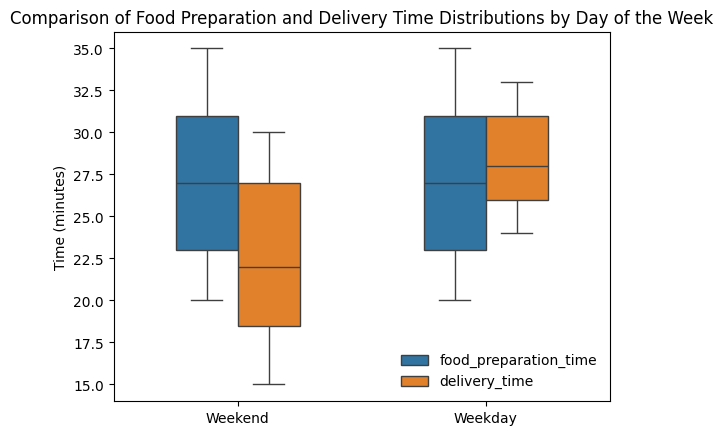

In [682]:
# Box plot of delivery time and food preparation time by day of the week
ax = sns.boxplot(x='day_of_the_week', y='value', hue='variable',
                 data=pd.melt(df[['day_of_the_week', 'food_preparation_time', 'delivery_time']],
                 id_vars='day_of_the_week', var_name='variable', value_name='value'),width=0.5)
ax.set(xlabel='', ylabel='Time (minutes)')  # Remove x-axis label
ax.legend(title='', frameon=False)  # Remove legend title and box
ax.set_title('Comparison of Food Preparation and Delivery Time Distributions by Day of the Week')
plt.show()

In [683]:
# Prints the mean delivery time for each day of the week
df_tt.groupby(['day_of_the_week'])['delivery_time'].mean()

day_of_the_week
Weekday   28.340
Weekend   22.470
Name: delivery_time, dtype: float64

In [684]:
# Prints the standard devation of the delivery time for each day of the week
df_tt.groupby(['day_of_the_week'])['delivery_time'].std()

day_of_the_week
Weekday   2.891
Weekend   4.629
Name: delivery_time, dtype: float64

In [685]:
print('> Delivery time (weekdays): mean =',m2hms(28.340,1),'; std =',m2hms(2.891,1),
      '\n> Delivery time (weekend):  mean =',m2hms(22.470,1),'; std =',m2hms(4.629,1))

> Delivery time (weekdays): mean = 28 m. 20 s. ; std = 2 m. 53 s. 
> Delivery time (weekend):  mean = 22 m. 28 s. ; std = 4 m. 38 s.


#### Observations:

- The analysis of delivery time reveals notable variations between weekdays and weekends. On weekdays, the mean delivery time is approximately 28.3 minutes (28 minutes and 20 seconds), with a standard deviation of approximately 2.9 minutes (2 minutes and 53 seconds). In contrast, weekends exhibit a shorter mean delivery time of approximately 22.5 minutes (22 minutes and 28 seconds), accompanied by a higher standard deviation of approximately 4.6 minutes (4 minutes and 38 seconds). Despite the majority of orders being placed on weekends, these results suggest the influence of external factors in the delivery process, such as traffic, impacting delivery efficiency during weekdays.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

*   **FoodHub Data Dictionary Alignment:** During the analysis of the DataFrame, it was observed that the variable 'cost_of_the_order' in the dataset aligns with the 'cost' variable as defined in the data dictionary. Despite the labeling discrepancy, all other variables maintain consistency with their specified descriptions.

*   **Customer Behavior and Order price:** The majority of customers (65.3%) have placed a single order. About 32.3% of orders fall within the \$10-15 range, and 50.0% within the \$10-20 range. Majority of orders (99.5%) fall within the \$5-35 range. Approximately 29.2% of orders cost more than $20, indicating a diverse range of order preferences.

*   **Restaurant and Cuisine:** The Top restaurants are Shake Shack, The Meatball Shop, and Blue Ribbon. The top 10 restaurants handle 46.7% of all orders. The top 5 cuisine types contribute to 86.6% of orders. There is a need to explore and understand customer preferences in lesser-represented cuisine types.

*   **Rating and Feedback:** A significant portion of customers (38.8%) did not provide a rating for their orders. The rating distribution shows a preference for high ratings (4 and 5 stars).

*   **Total Time Analysis:** The mean total time for order fulfillment is approximately 51.53 minutes. Delivery times tend to be higher on weekdays, suggesting potential external factors like traffic.


### Recommendations:

*   **Increase Order Frequency:** Encourage customers with fewer than 3 orders to provide feedback on their experience. Implement a loyalty program or offer discounts for customers placing multiple orders. Follow up with customers who choose not to rate orders to gather insights into their feedback. Consider associating discounts with the rating process to motivate customer engagement.

*   **Optimize Marketing Strategies:** Focus marketing efforts on weekdays to balance order distribution. Use customer location data to improve marketing strategies for both weekday and weekend customers. Develop marketing strategies specific to weekend customers to increase order costs. Enhance marketing strategies with a more detailed customer segmentation model if additional data becomes available.

*   **Restaurant and Cuisine Strategy:** Provide targeted promotions for restaurants and cuisine types with lower order frequencies. Conduct cost-benefit analyses for underperforming restaurants and offer improvement suggestions. Introduce ads or push notifications for newly introduced restaurants or cuisine types. Investigate the impact of food type on price/quality and analyze customer preferences for specific food items.

*   **Improve Total Order Time:** Address disparities in delivery times between weekdays and weekends by optimizing delivery processes. Explore potential causes of low weekday orders, considering factors like delivery time. Analyze factors contributing to longer delivery times on weekdays and address them.Consider external factors such as traffic patterns.








---